In [1]:
import pandas as pd
import os

project_folder="C:/Users/hanson/OneDrive/Grad/Grad Project/data_realtorCA/"
output_folder=project_folder+"output"

df=pd.read_csv(output_folder+"/"+"all_after_preprocessing5.csv")

In [3]:
df.styleAttach.value_counts()

Attached         5253
Detached         3789
Semi-detached     769
Vacant Land       362
Stacked            46
Up and down        20
Link               10
Side by side        2
Name: styleAttach, dtype: int64

## For maintenance company, change unique companies to "other"

In [96]:
pd.set_option("display.max_rows", None)

In [97]:
#df = df.groupby('maintenanceManagementCompany').filter(lambda x: len(x) > 1)
df.loc[df["maintenanceManagementCompany"].value_counts()[df["maintenanceManagementCompany"]].values < 2, "maintenanceManagementCompany"] = "ONLY ONE OCCURANCE"


In [98]:
df.loc[df["maintenanceManagementCompany"]=="ONLY ONE OCCURANCE", "maintenanceManagementCompany"]="Other"
df.loc[df["maintenanceManagementCompany"]=="self managed", "maintenanceManagementCompany"]="Other"

In [99]:
df.maintenanceManagementCompany.value_counts(dropna=False)

NotListed                                           6021
crossbridge condominium services                     510
del property management                              476
first service residential                            314
icc property management                              176
maple ridge property management                      165
Other                                                164
icon property management                             155
duka property management                             131
condo management group                               114
wilson blanchard management                           84
tbd                                                   79
threesixty community management                       77
goldview property management                          61
brookfield property                                   57
apollo property management                            55
comfort property management                           47
royale grande property manageme

In [100]:
df.cooling.value_counts()

Central air conditioning    8748
NotListed                   1160
Wall unit                    183
Window air conditioner       126
Heat Pump                     33
Air exchanger                  1
Name: cooling, dtype: int64

## Statistics for Column "Price" 
## For all listings  

Set the display option for describe()

In [101]:
pd.set_option('float_format', '{:.2f}'.format)

In [102]:
df["price"].describe()

count      10251.00
mean     1290211.77
std      1844750.33
min        87900.00
25%       629000.00
50%       858800.00
75%      1300000.00
max     49000000.00
Name: price, dtype: float64

Average price for all listings

In [103]:
df["price"].mean()

1290211.7709491756

Median price for all listings  

In [104]:
df["price"].median()

858800.0

Mode price for all listings

In [105]:
df["price"].mode()

0    599900
dtype: int64

In [106]:
df["price"]=df["price"].astype(int)

## For Toronto

In [107]:
df_toronto=df[df["city"]=="Toronto"]
len(df_toronto)

5451

In [108]:
df_toronto["price"].describe()

count       5451.00
mean     1426146.16
std      1721796.20
min       195000.00
25%       659000.00
50%       929900.00
75%      1522500.00
max     45000000.00
Name: price, dtype: float64

In [109]:
df_toronto["price"].mean()

1426146.1632727939

In [110]:
df_toronto["price"].median()

929900.0

In [111]:
df_toronto["price"].mode()

0    799000
dtype: int32

## For Ottawa

In [112]:
df_ottawa=df[df["city"]=="Ottawa"]
len(df_ottawa)

1348

In [113]:
df_ottawa["price"].describe()

count       1348.00
mean      955592.45
std      1040719.42
min        87900.00
25%       488750.00
50%       655000.00
75%       968475.00
max     16500000.00
Name: price, dtype: float64

In [114]:
df_ottawa["price"].mean()

955592.4480712166

In [115]:
df_ottawa["price"].median()

655000.0

In [116]:
df_ottawa["price"].mode()

0    599900
dtype: int32

## For Hamilton

In [117]:
df_hamilton=df[df["city"]=="Hamilton"]
len(df_hamilton)

1345

In [118]:
df_hamilton["price"].describe()

count       1345.00
mean     1144218.07
std      2692325.48
min        98500.00
25%       599000.00
50%       750000.00
75%      1000800.00
max     49000000.00
Name: price, dtype: float64

In [119]:
df_hamilton["price"].mean()

1144218.0743494423

In [120]:
df_hamilton["price"].median()

750000.0

In [121]:
df_hamilton["price"].mode()

0    799900
dtype: int32

## For Mississauga

In [122]:
df_missi=df[df["city"]=="Mississauga"]
len(df_missi)

1124

In [123]:
df_missi["price"].describe()

count       1124.00
mean     1326968.91
std      2033277.56
min       349900.00
25%       629900.00
50%       899000.00
75%      1365942.50
max     45000000.00
Name: price, dtype: float64

In [124]:
df_missi["price"].mean()

1326968.9128113878

In [125]:
df_missi["price"].median()

899000.0

In [126]:
df_missi["price"].mode()

0    599000
dtype: int32

## For Brampton

In [127]:
df_brampton=df[df["city"]=="Brampton"]
len(df_brampton)

983

In [128]:
df_brampton["price"].describe()

count        983.00
mean     1153014.38
std      1621109.88
min       385000.00
25%       749999.00
50%       899900.00
75%      1237000.00
max     32000000.00
Name: price, dtype: float64

In [129]:
df_brampton["price"].mean()

1153014.3845371313

In [130]:
df_brampton["price"].median()

899900.0

In [131]:
df_brampton["price"].median()

899900.0

## Visualization: Show the distribution for house lower than 2 milion $  

In [132]:
price_lowerthan=2000000
num_bins=40

C:\Users\hanson\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


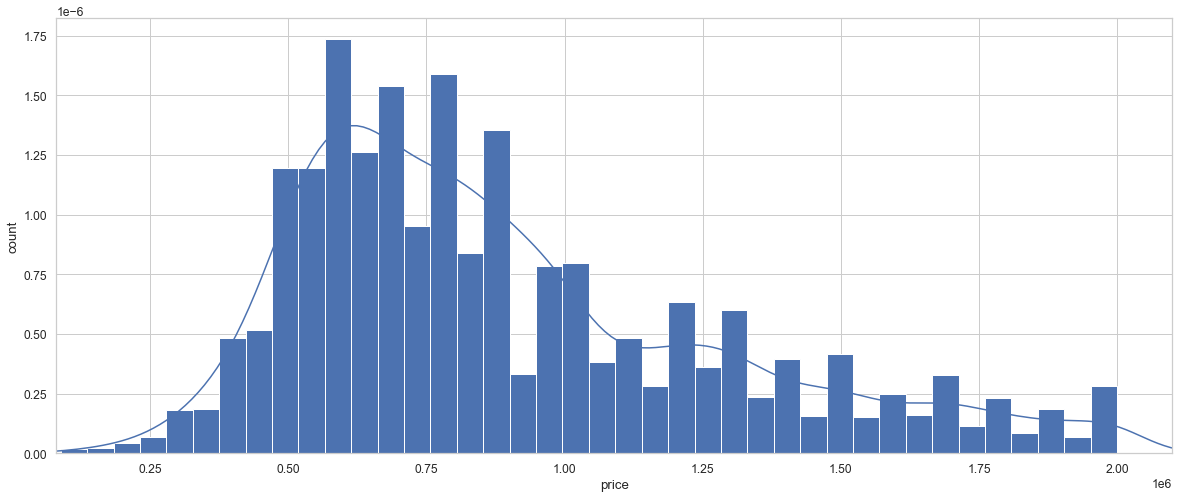

In [133]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [20, 8]})
sns.distplot(
    df[df['price']<=price_lowerthan]['price'], norm_hist=False, kde=True, bins=num_bins, hist_kws={"alpha": 1}).set(xlabel='price', ylabel='count',xlim=(80000,price_lowerthan+100000));

In [134]:
#skewness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())


Skewness: 12.313025
Kurtosis: 243.138178


## Toronto  

C:\Users\hanson\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


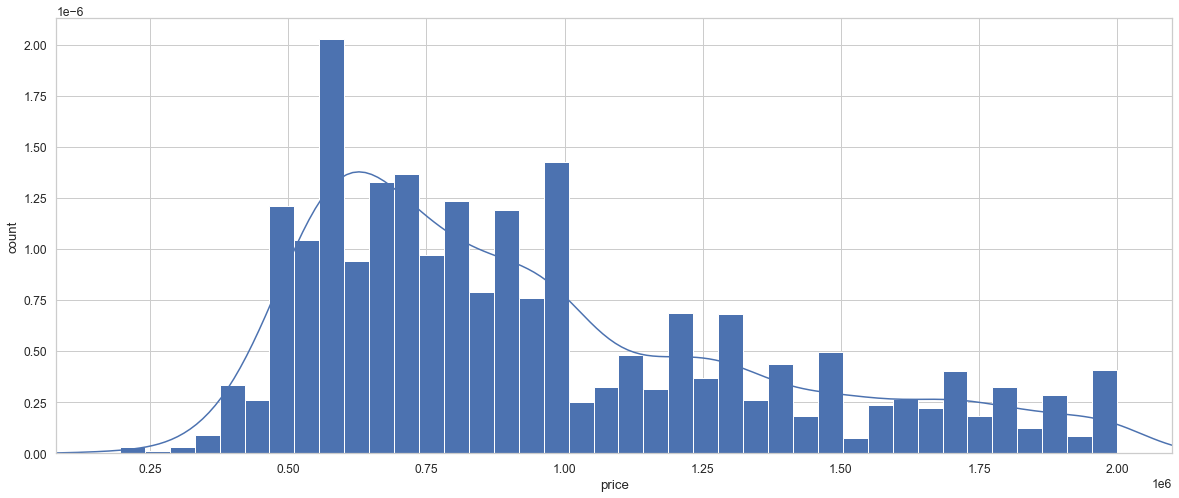

In [135]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [20, 8]})
sns.distplot(
    df_toronto[df_toronto['price']<=price_lowerthan]['price'], norm_hist=False, kde=True, bins=num_bins, hist_kws={"alpha": 1}
).set(xlabel='price', ylabel='count',xlim=(80000,price_lowerthan+100000));

## Ottawa

C:\Users\hanson\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


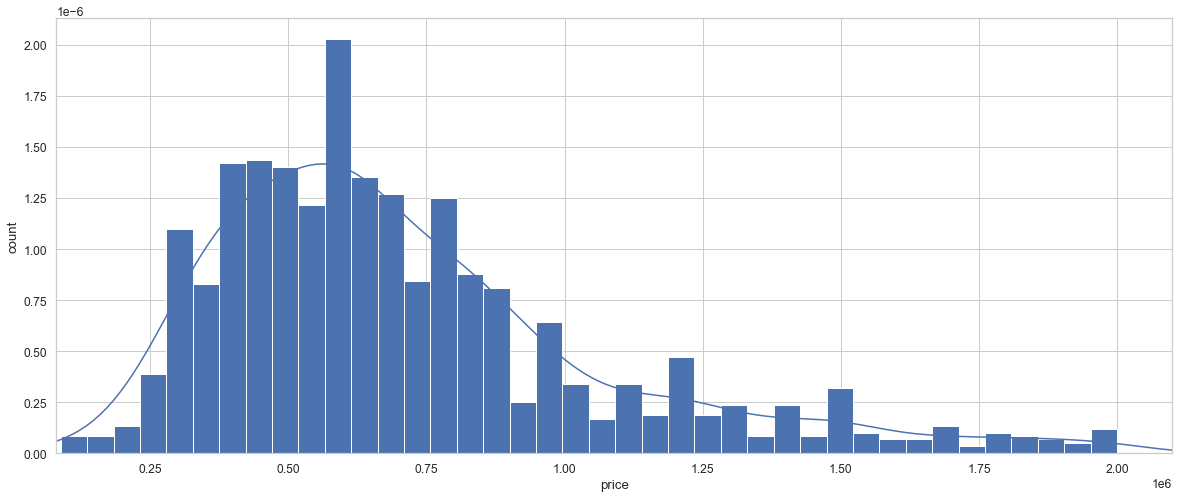

In [136]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [20, 8]})
sns.distplot(
    df_ottawa[df_ottawa['price']<=price_lowerthan]['price'], norm_hist=False, kde=True, bins=num_bins, hist_kws={"alpha": 1}
).set(xlabel='price', ylabel='count',xlim=(80000,price_lowerthan+100000));

## Hamilton

C:\Users\hanson\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


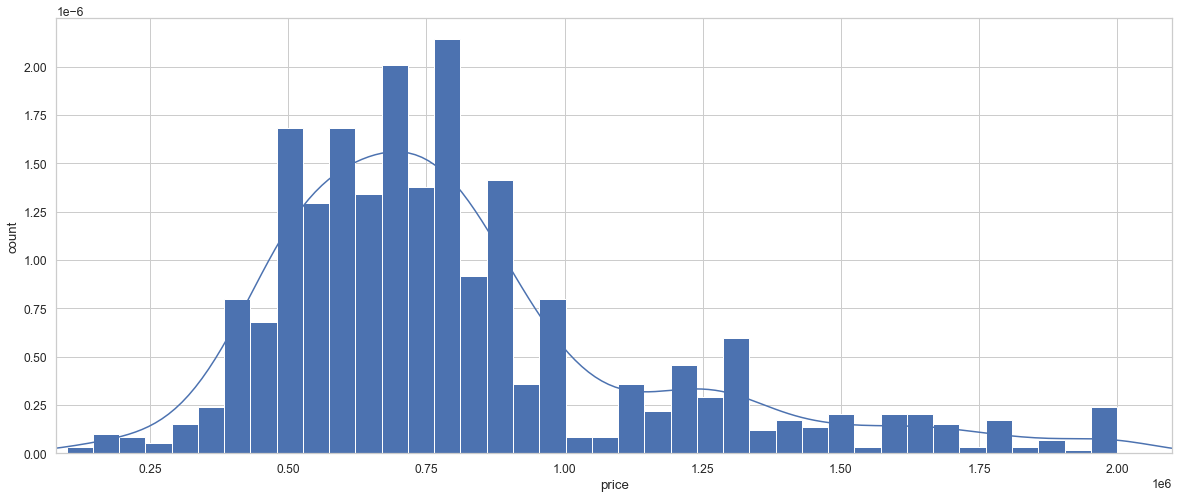

In [137]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [20, 8]})
sns.distplot(
    df_hamilton[df_hamilton['price']<=price_lowerthan]['price'], norm_hist=False, kde=True, bins=num_bins, hist_kws={"alpha": 1}
).set(xlabel='price', ylabel='count',xlim=(80000,price_lowerthan+100000));

## Mississauga

C:\Users\hanson\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


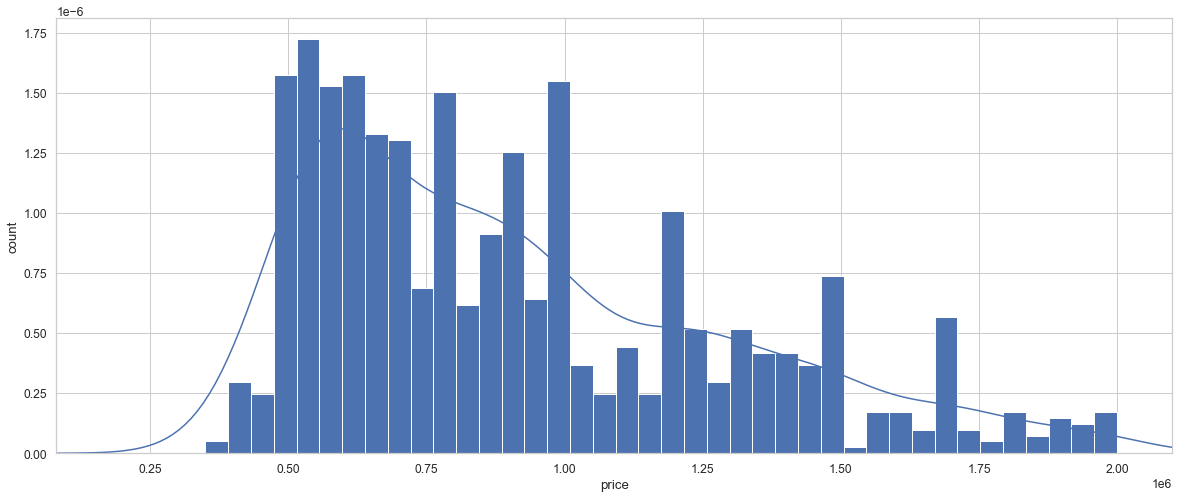

In [138]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [20, 8]})
sns.distplot(
    df_missi[df_missi['price']<=price_lowerthan]['price'], norm_hist=False, kde=True, bins=num_bins, hist_kws={"alpha": 1}
).set(xlabel='price', ylabel='count',xlim=(80000,price_lowerthan+100000));

## Brampton

C:\Users\hanson\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


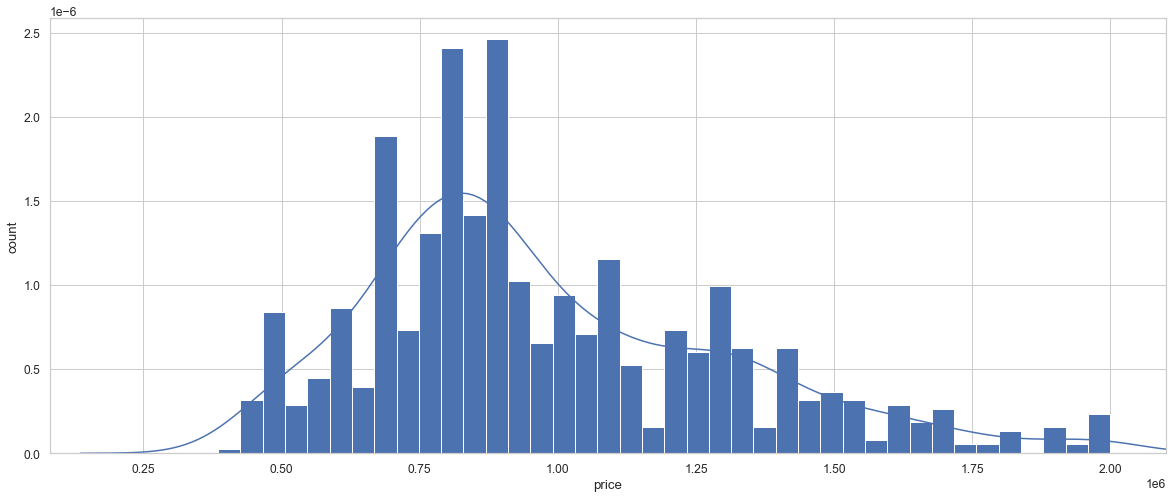

In [139]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [20, 8]})
sns.distplot(
    df_brampton[df_brampton['price']<=price_lowerthan]['price'], norm_hist=False, kde=True, bins=num_bins, hist_kws={"alpha": 1}
).set(xlabel='price', ylabel='count',xlim=(80000,price_lowerthan+100000));

## for all listings

## Check the distribution for BedroomAboveGrade

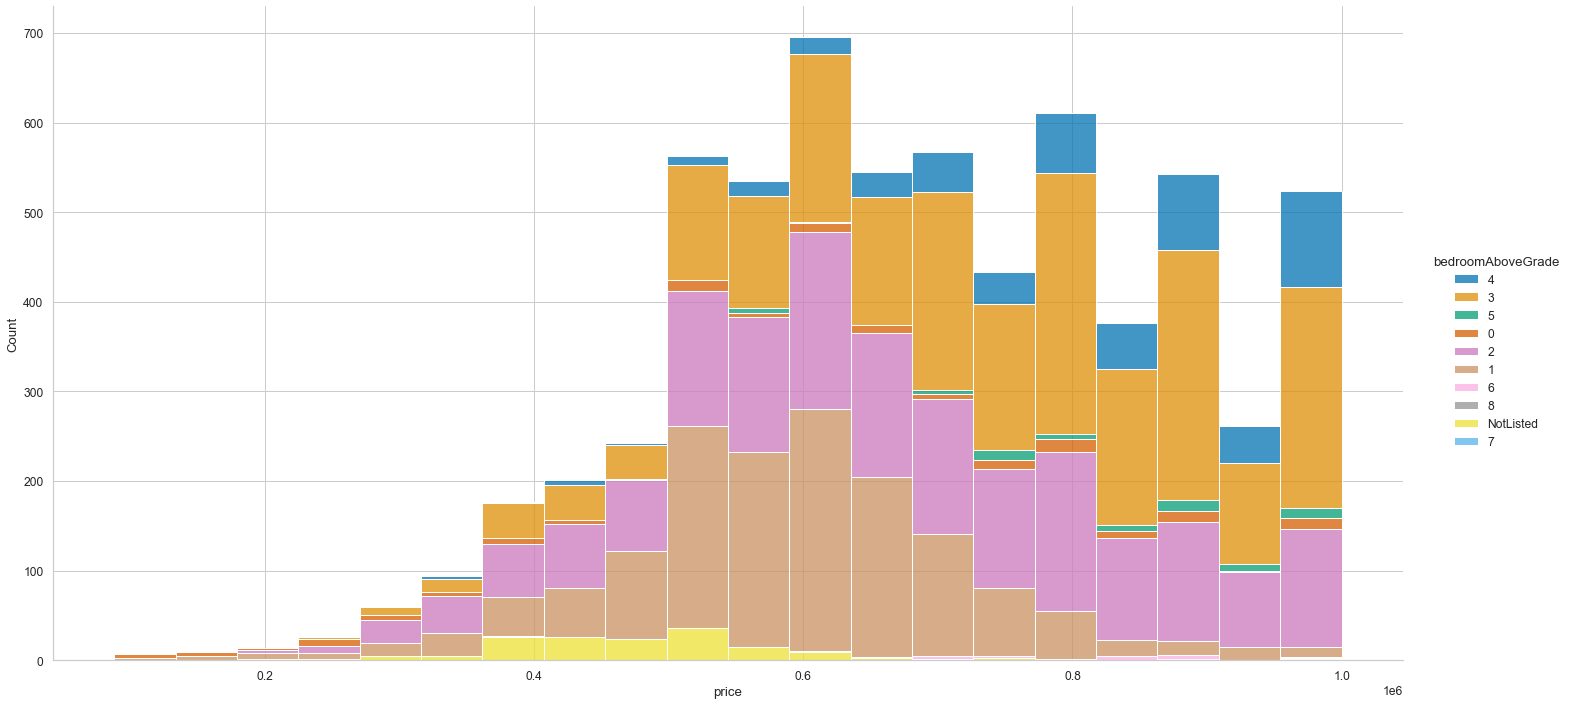

In [140]:
sns.displot(df[df["price"]<=1000000], x="price", hue="bedroomAboveGrade", multiple="stack",bins=20,
            height=10, aspect=2, palette='colorblind')

## check Bedroom Below Grade

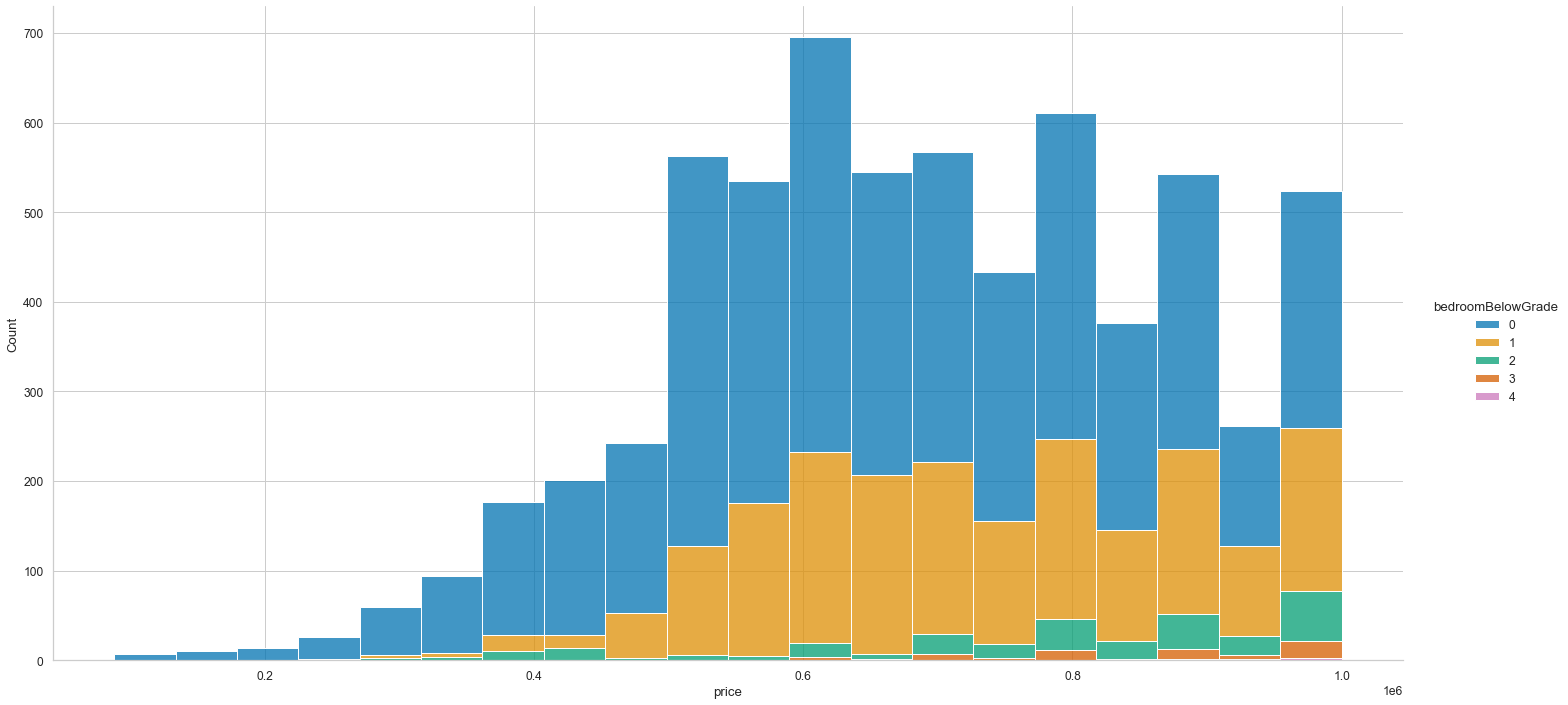

In [141]:
sns.displot(df[df["price"]<=1000000], x="price", hue="bedroomBelowGrade", multiple="stack",bins=20,
            height=10, aspect=2, palette='colorblind')

## check bathroomTotal

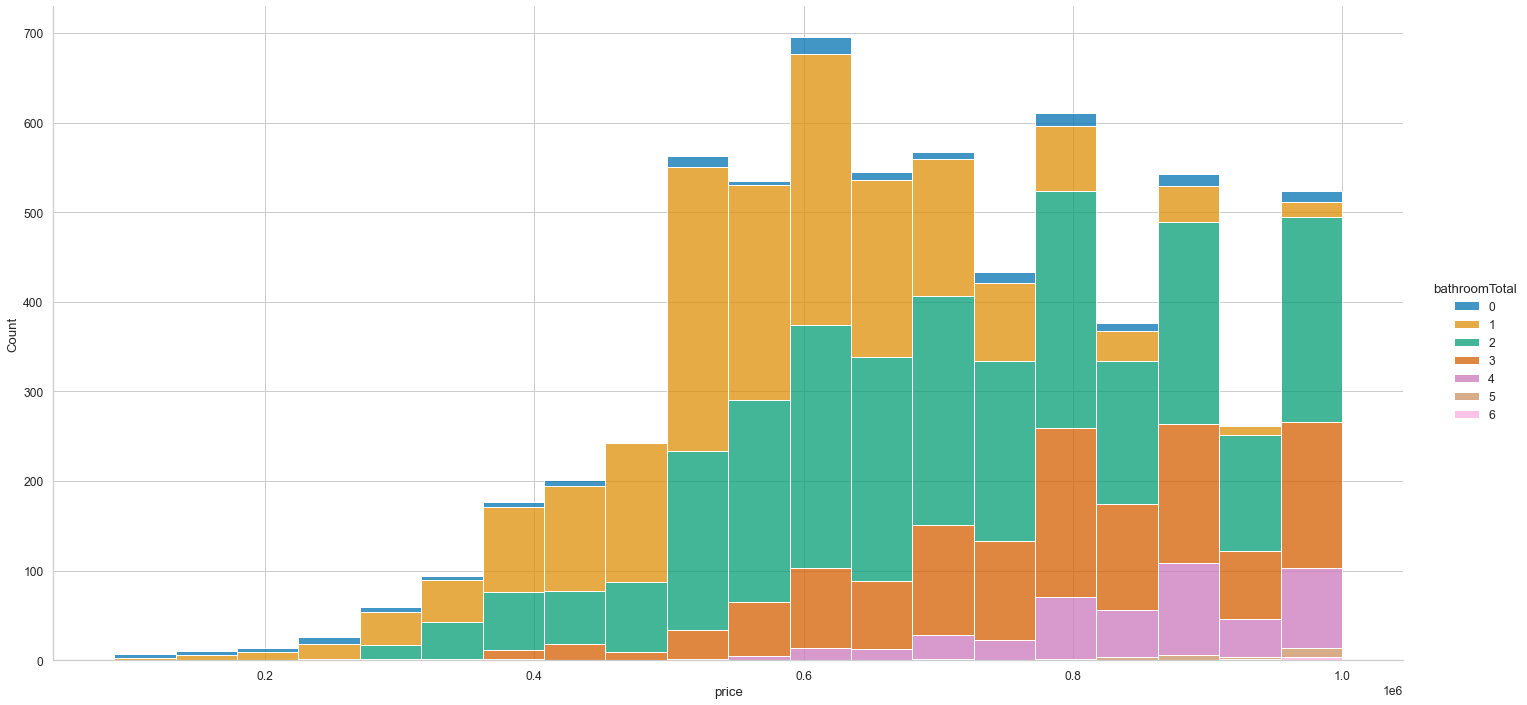

In [142]:
sns.displot(df[df["price"]<=1000000], x="price", hue="bathroomTotal", multiple="stack",bins=20,
            height=10, aspect=2, palette='colorblind')

## check bathroom partial

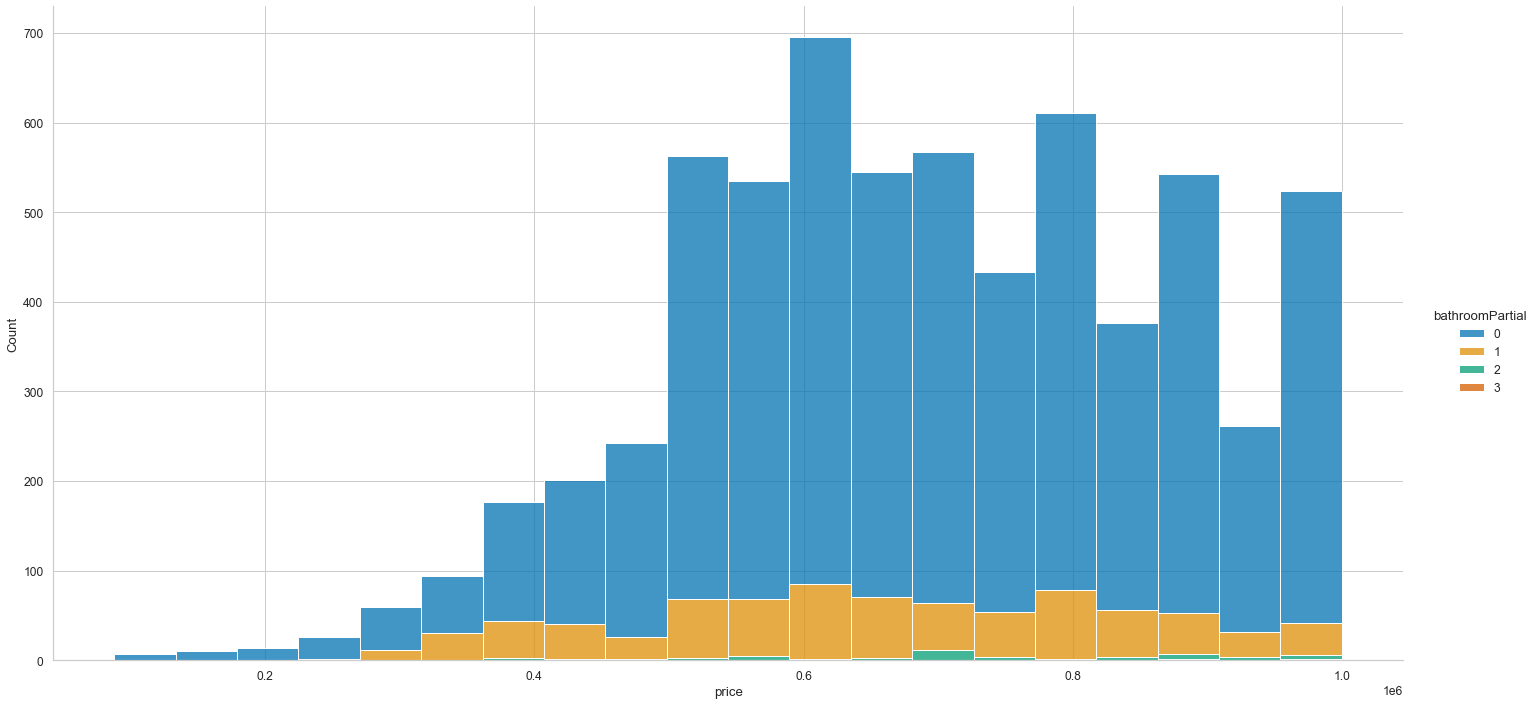

In [143]:
sns.displot(df[df["price"]<=1000000], x="price", hue="bathroomPartial", multiple="stack",bins=20,
            height=10, aspect=2, palette='colorblind')

## Check total parking spaces

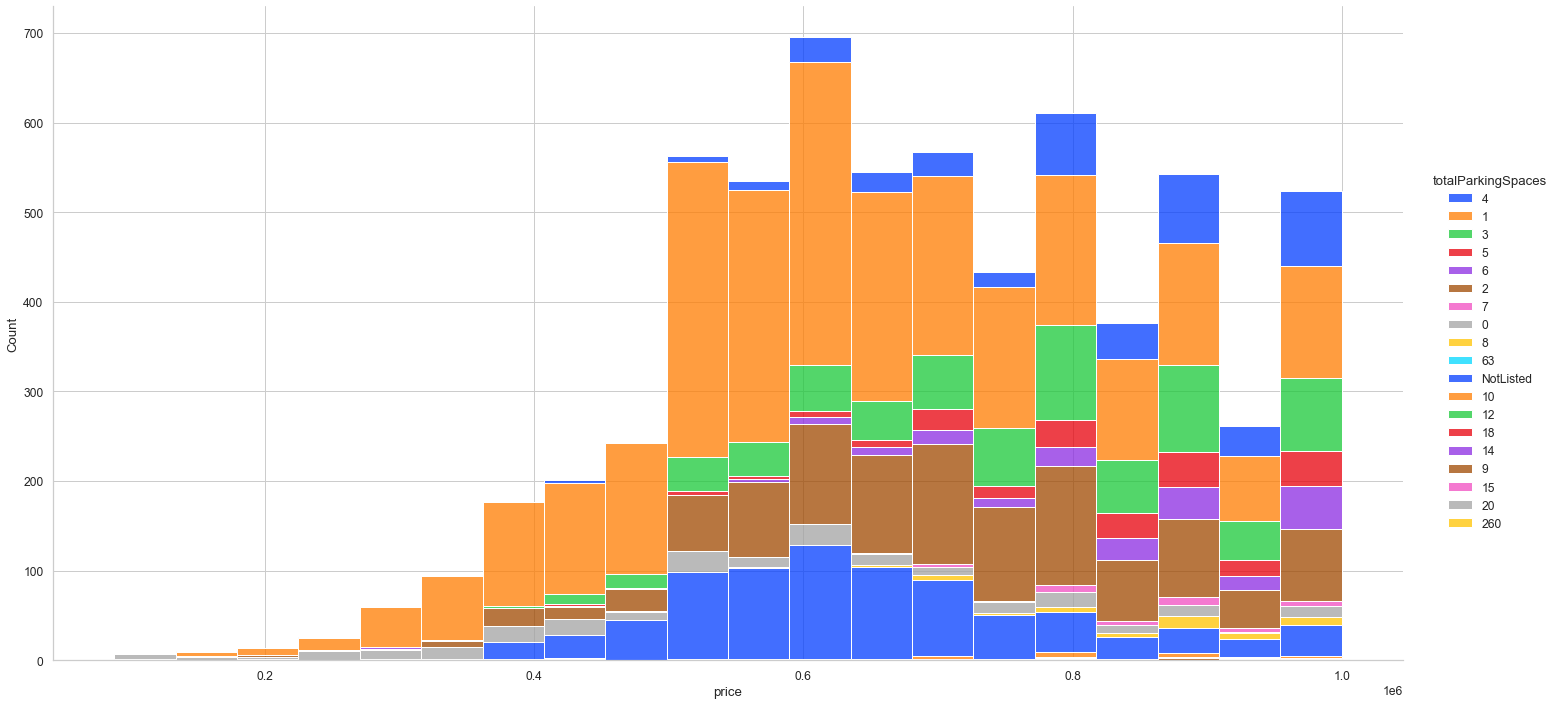

In [144]:
sns.displot(df[df["price"]<=1000000], x="price", hue="totalParkingSpaces", multiple="stack",bins=20,
            height=10, aspect=2, palette='bright')

## Check storeys

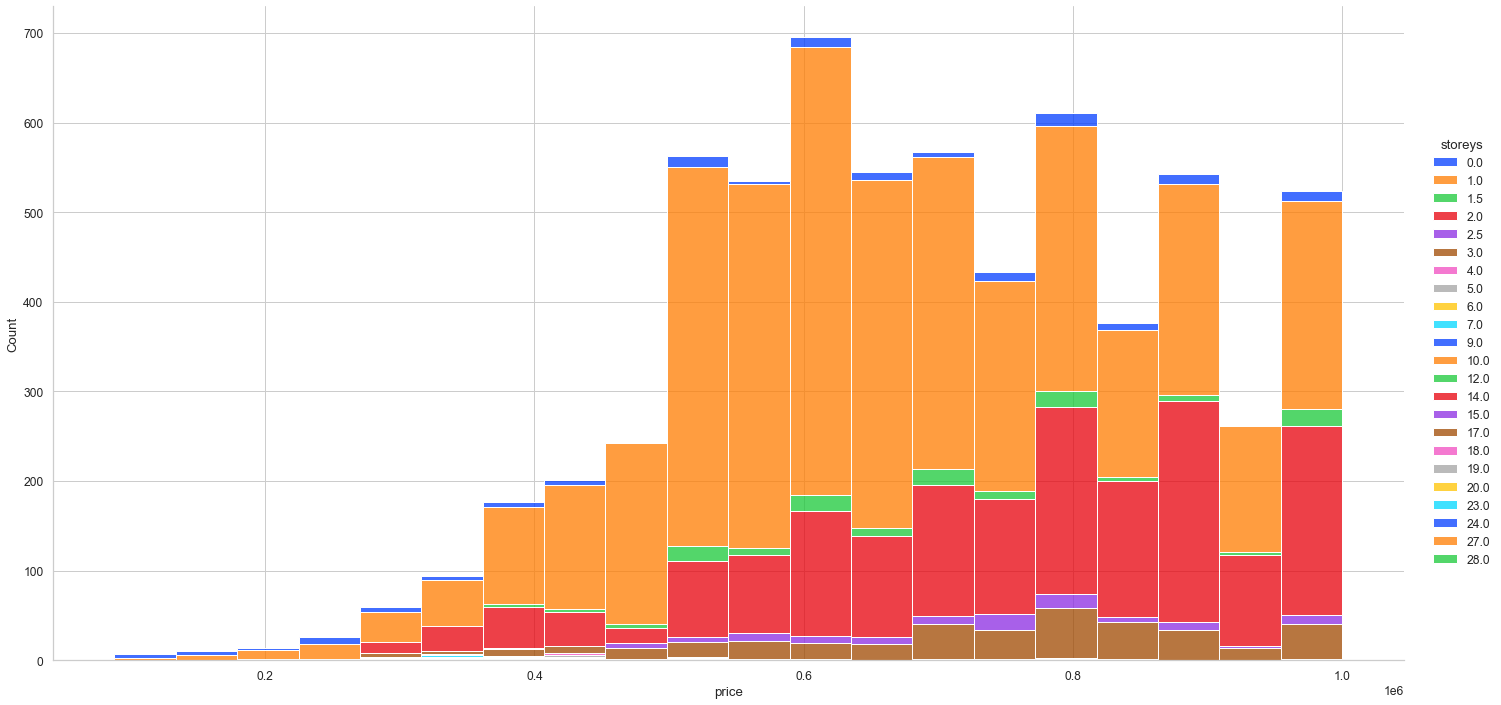

In [145]:
sns.displot(df[df["price"]<=1000000], x="price", hue="storeys", multiple="stack",bins=20,
            height=10, aspect=2, palette='bright')

## Check typeBuilding

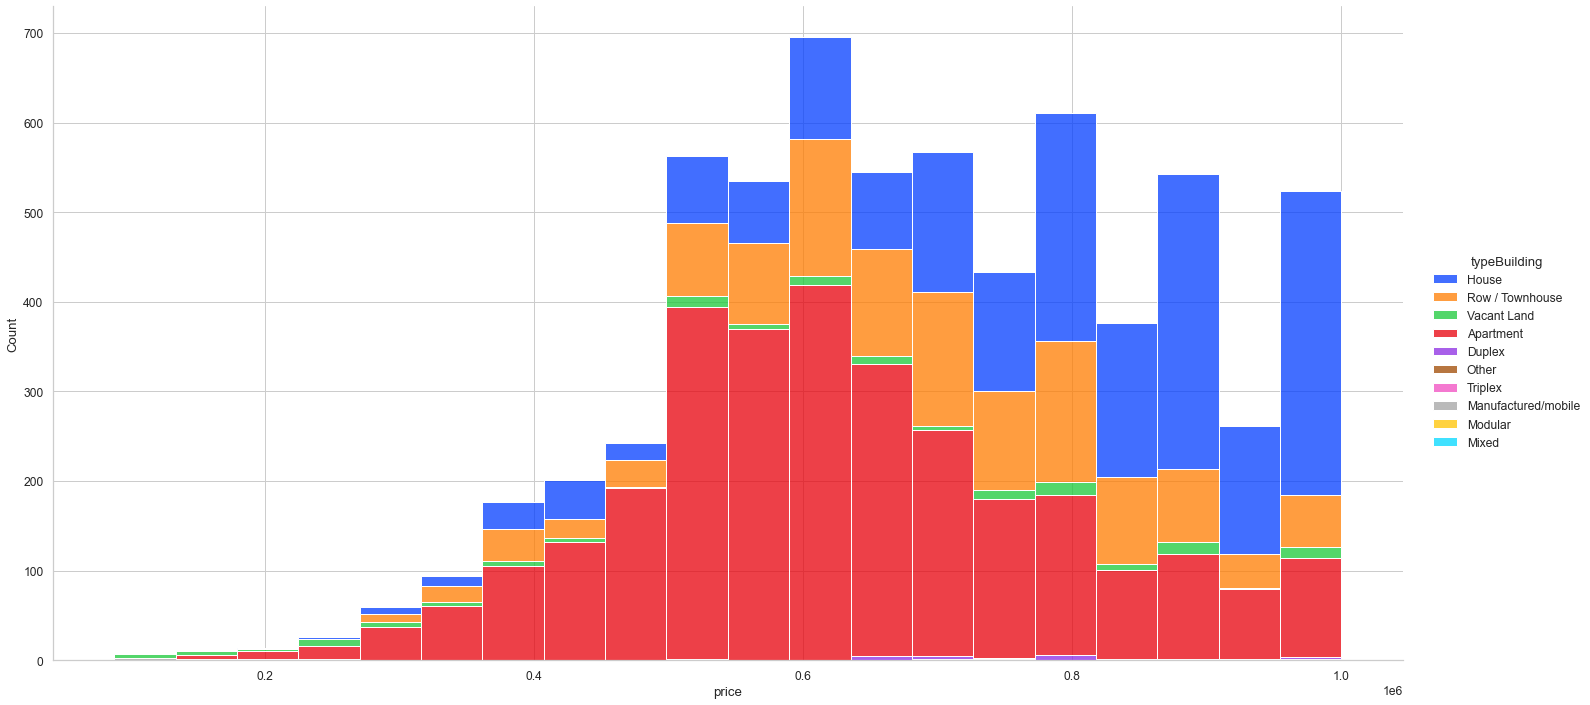

In [146]:
sns.displot(df[df["price"]<=1000000], x="price", hue="typeBuilding", multiple="stack",bins=20,
            height=10, aspect=2, palette='bright')

## Check title

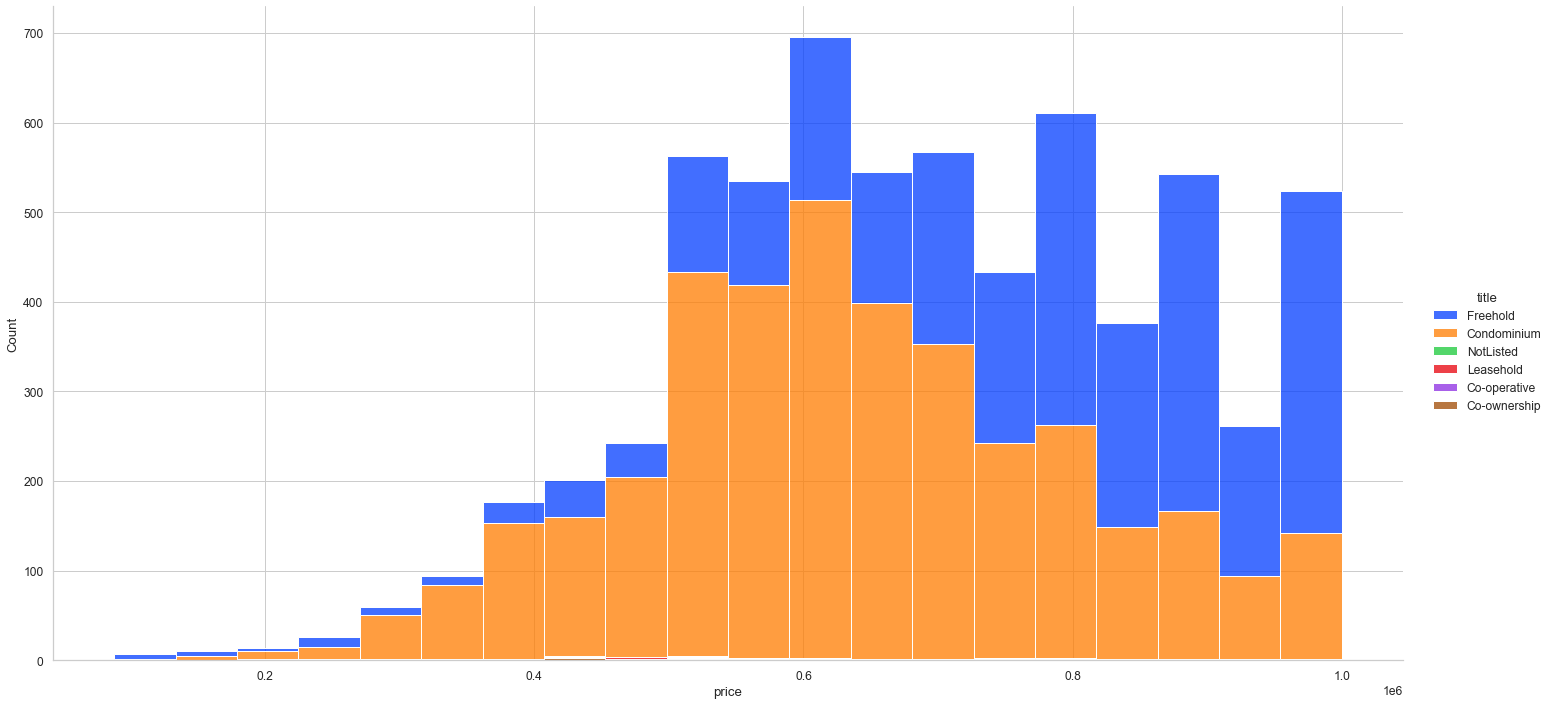

In [147]:
sns.displot(df[df["price"]<=1000000], x="price", hue="title", multiple="stack",bins=20,
            height=10, aspect=2, palette='bright')

## Check city

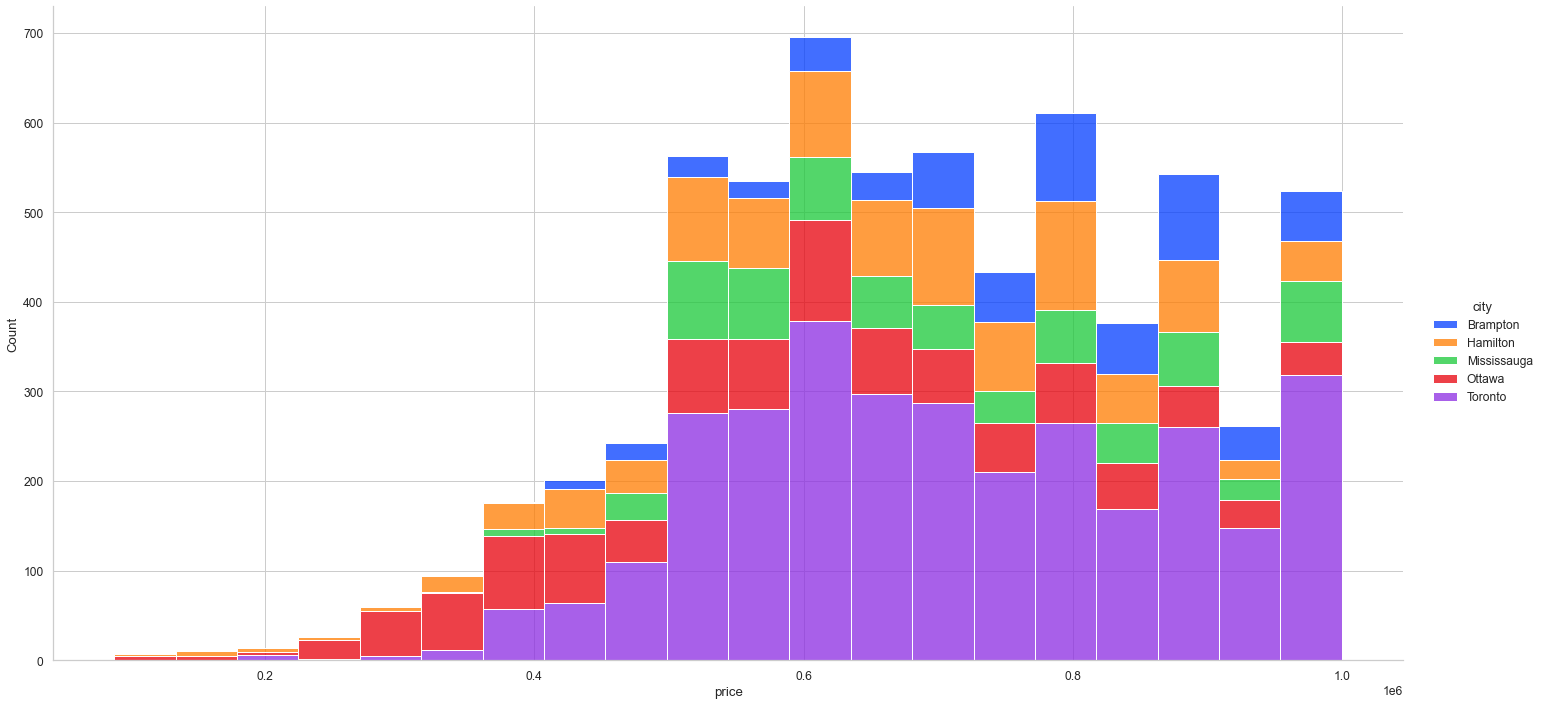

In [148]:
sns.displot(df[df["price"]<=1000000], x="price", hue="city", multiple="stack",bins=20,
            height=10, aspect=2, palette='bright')

## Check styleAttach

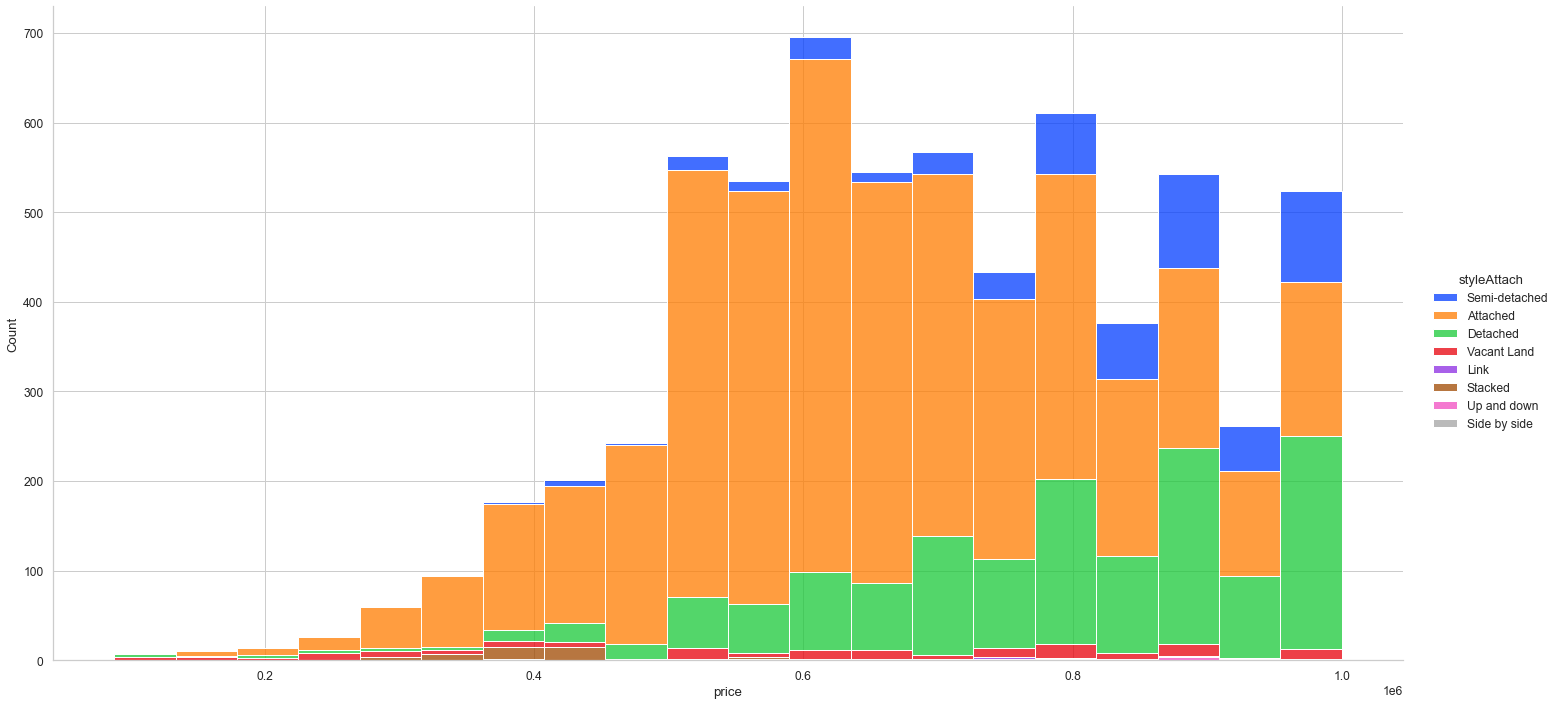

In [149]:
sns.displot(df[df["price"]<=1000000], x="price", hue="styleAttach", multiple="stack",bins=20,
            height=10, aspect=2, palette='bright')

## check cooling

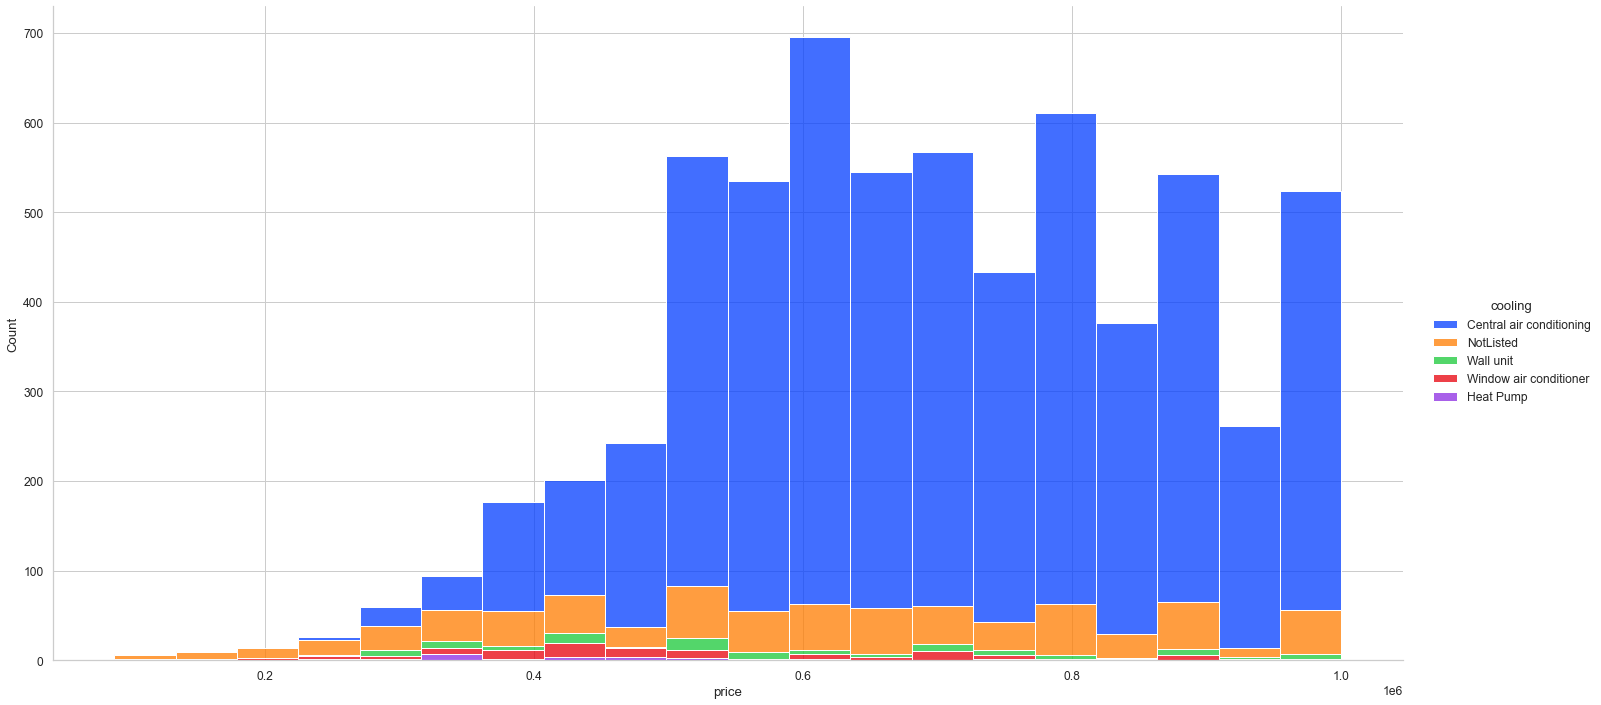

In [150]:
sns.displot(df[df["price"]<=1000000], x="price", hue="cooling", multiple="stack",bins=20,
            height=10, aspect=2, palette='bright')

## basementType

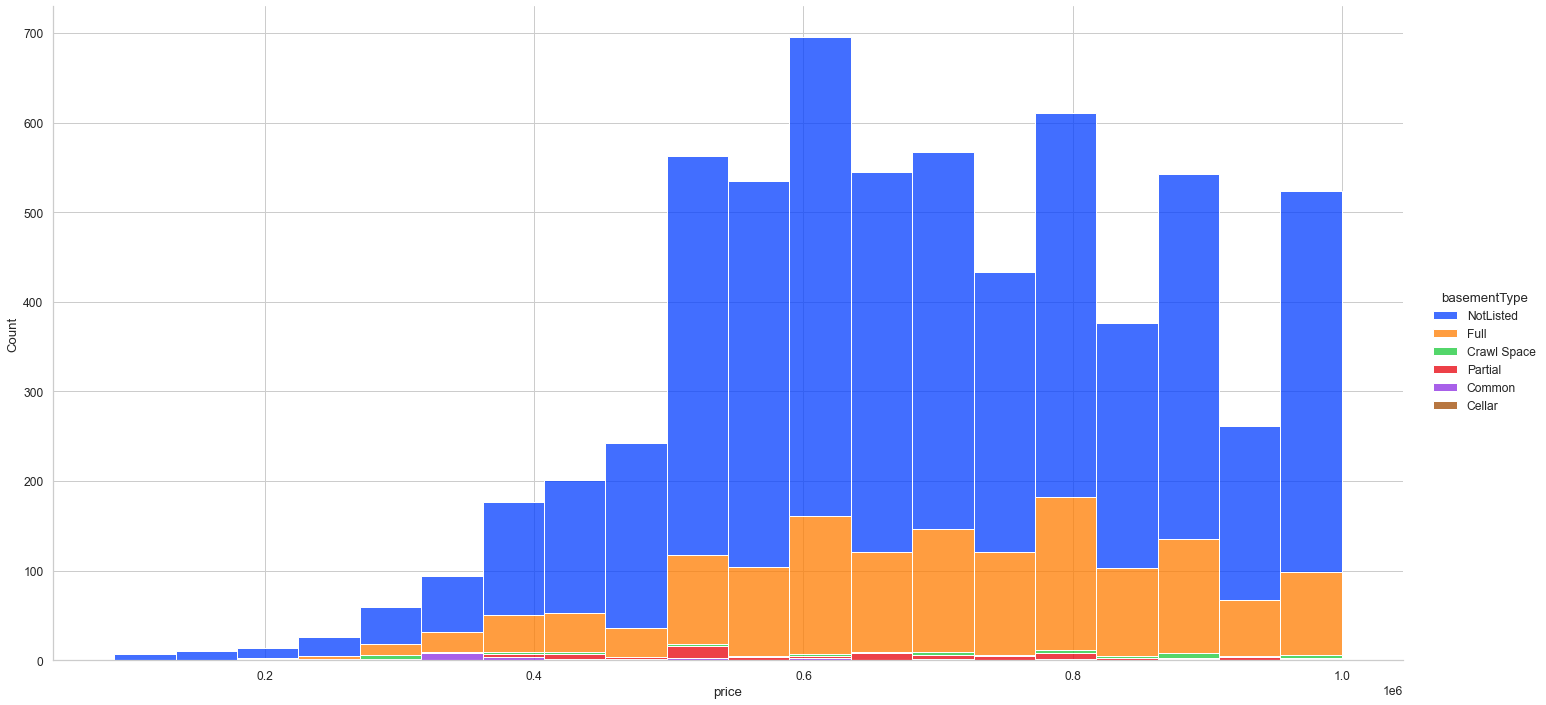

In [151]:
sns.displot(df[df["price"]<=1000000], x="price", hue="basementType", multiple="stack",bins=20,
            height=10, aspect=2, palette='bright')

## check basementFinish

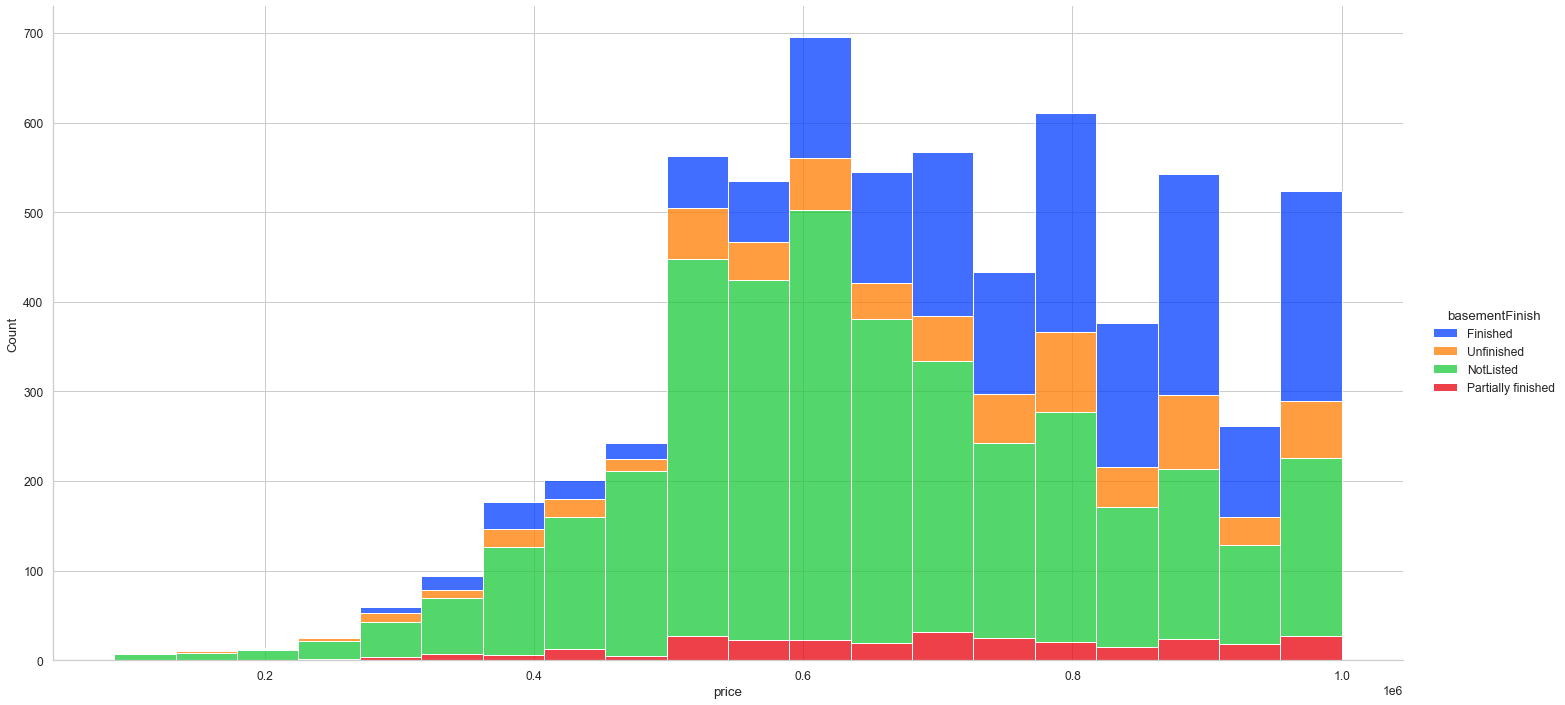

In [152]:
sns.displot(df[df["price"]<=1000000], x="price", hue="basementFinish", multiple="stack",bins=20,
            height=10, aspect=2, palette='bright')

## Check heatingType1

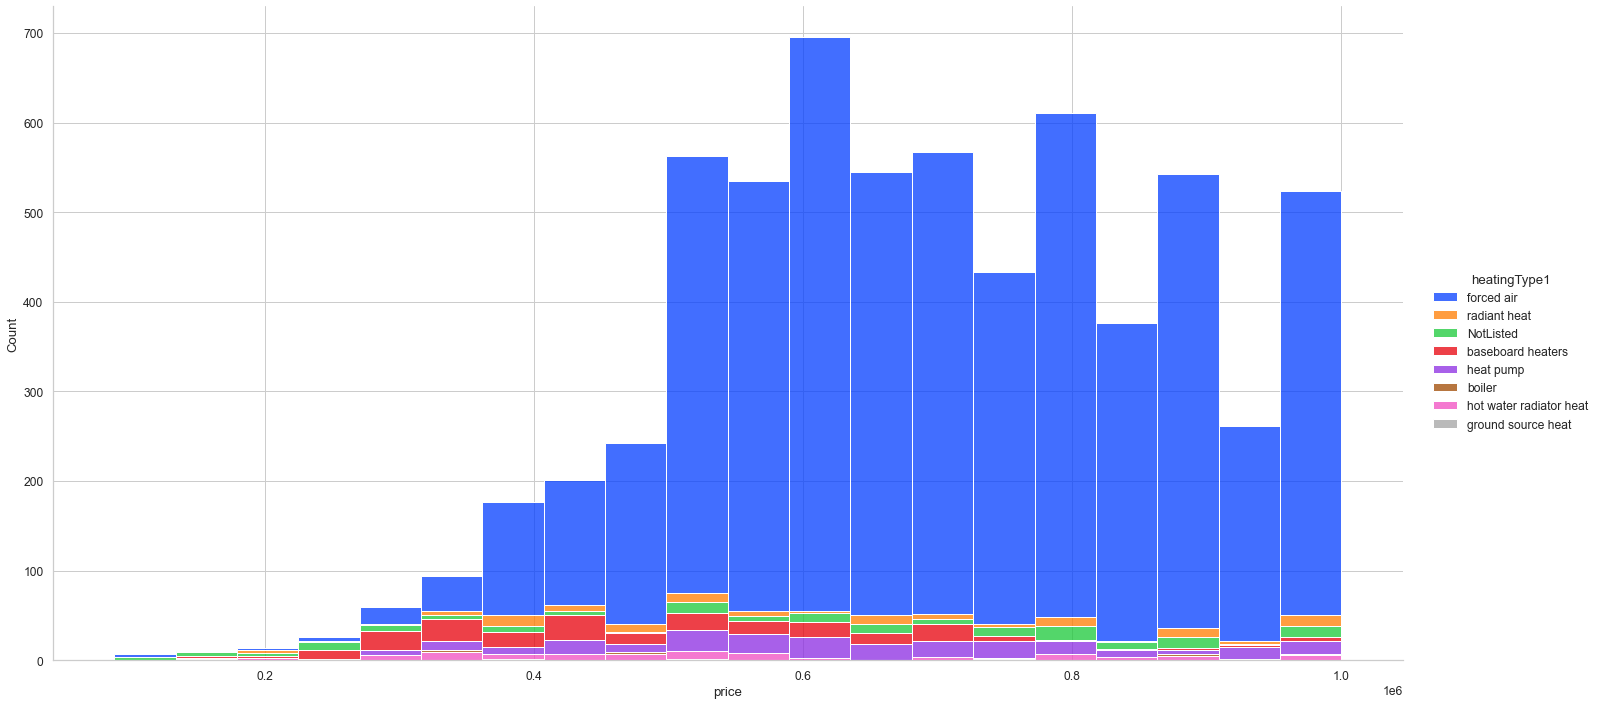

In [153]:
sns.displot(df[df["price"]<=1000000], x="price", hue="heatingType1", multiple="stack",bins=20,
            height=10, aspect=2, palette='bright')

## check heatingEnergy1

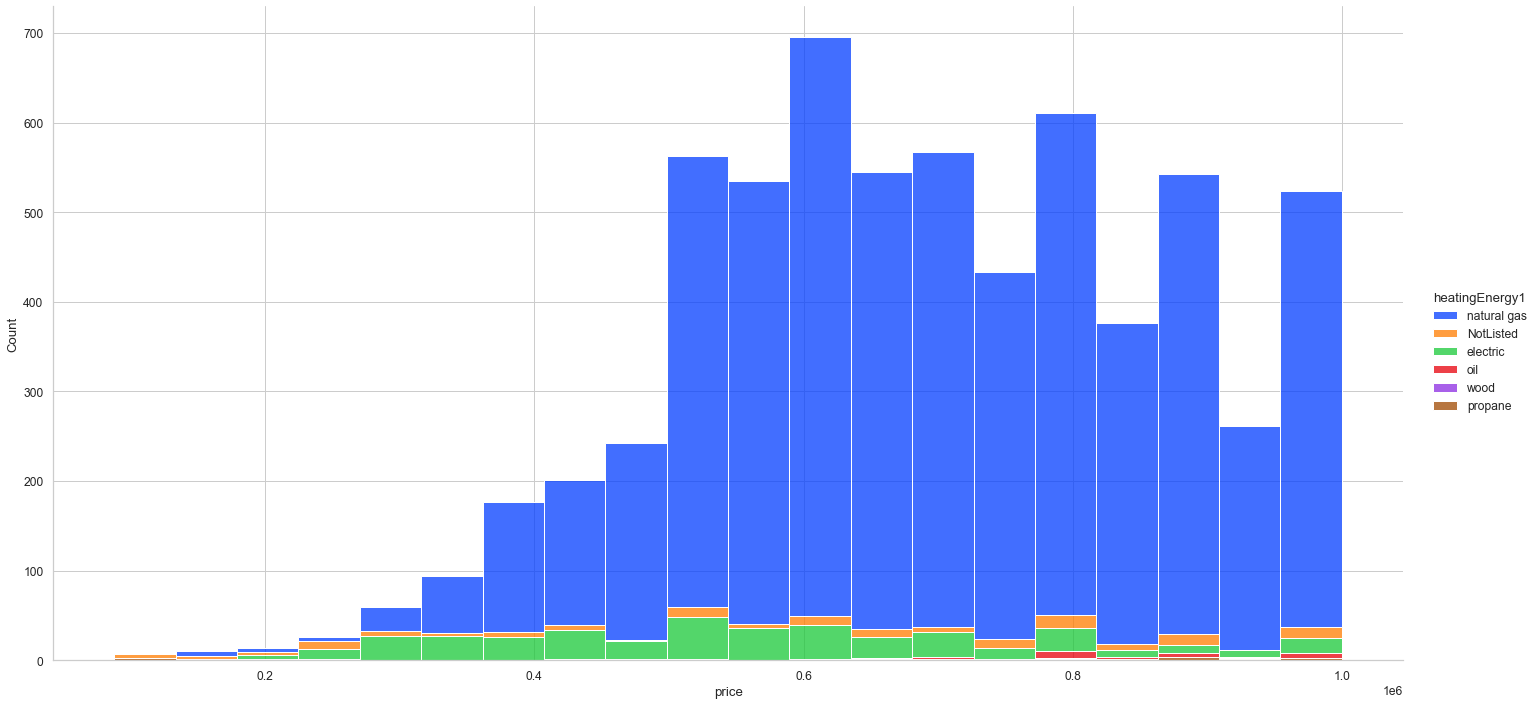

In [154]:
sns.displot(df[df["price"]<=1000000], x="price", hue="heatingEnergy1", multiple="stack",bins=20,
            height=10, aspect=2, palette='bright')

## check featureLotSlope

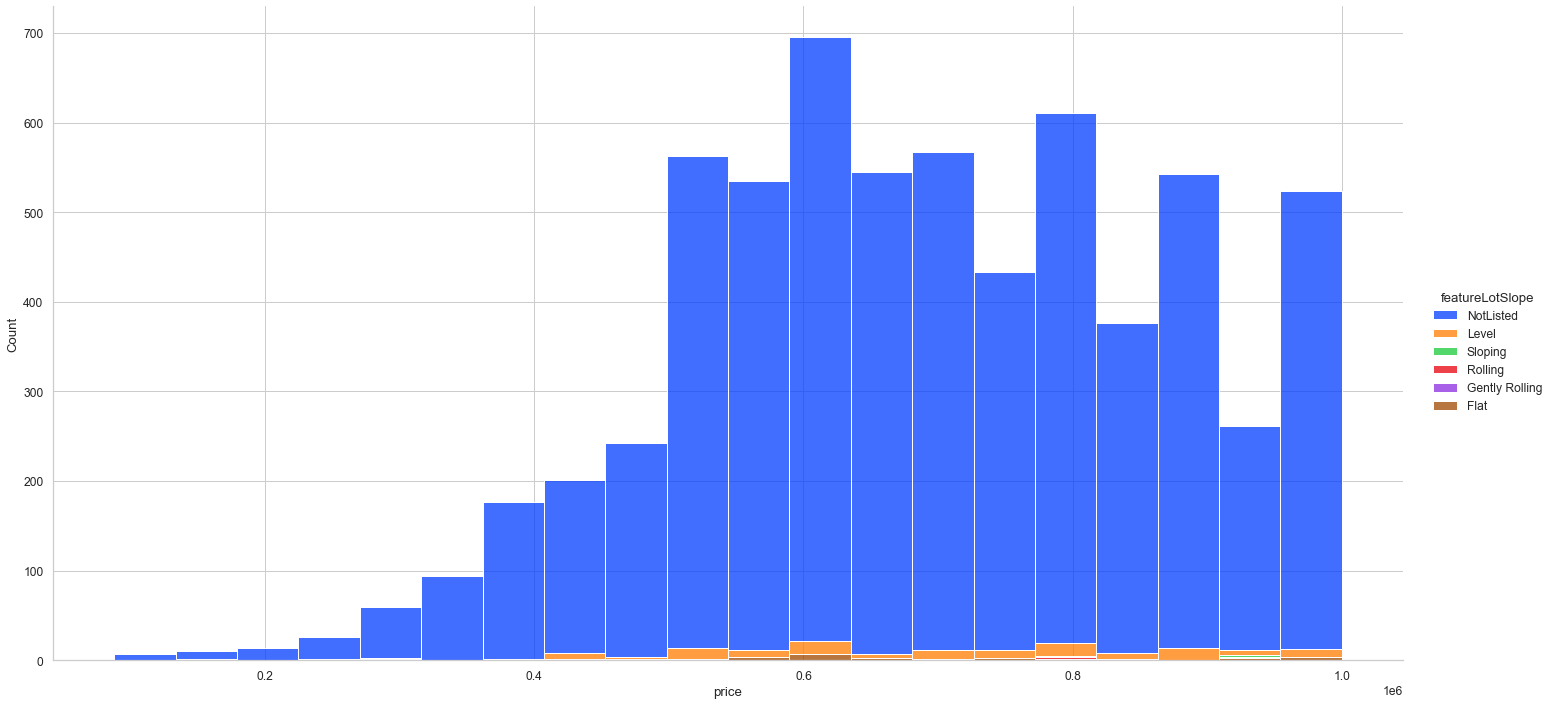

In [155]:
sns.displot(df[df["price"]<=1000000], x="price", hue="featureLotSlope", multiple="stack",bins=20,
            height=10, aspect=2, palette='bright')

## featureDriveway

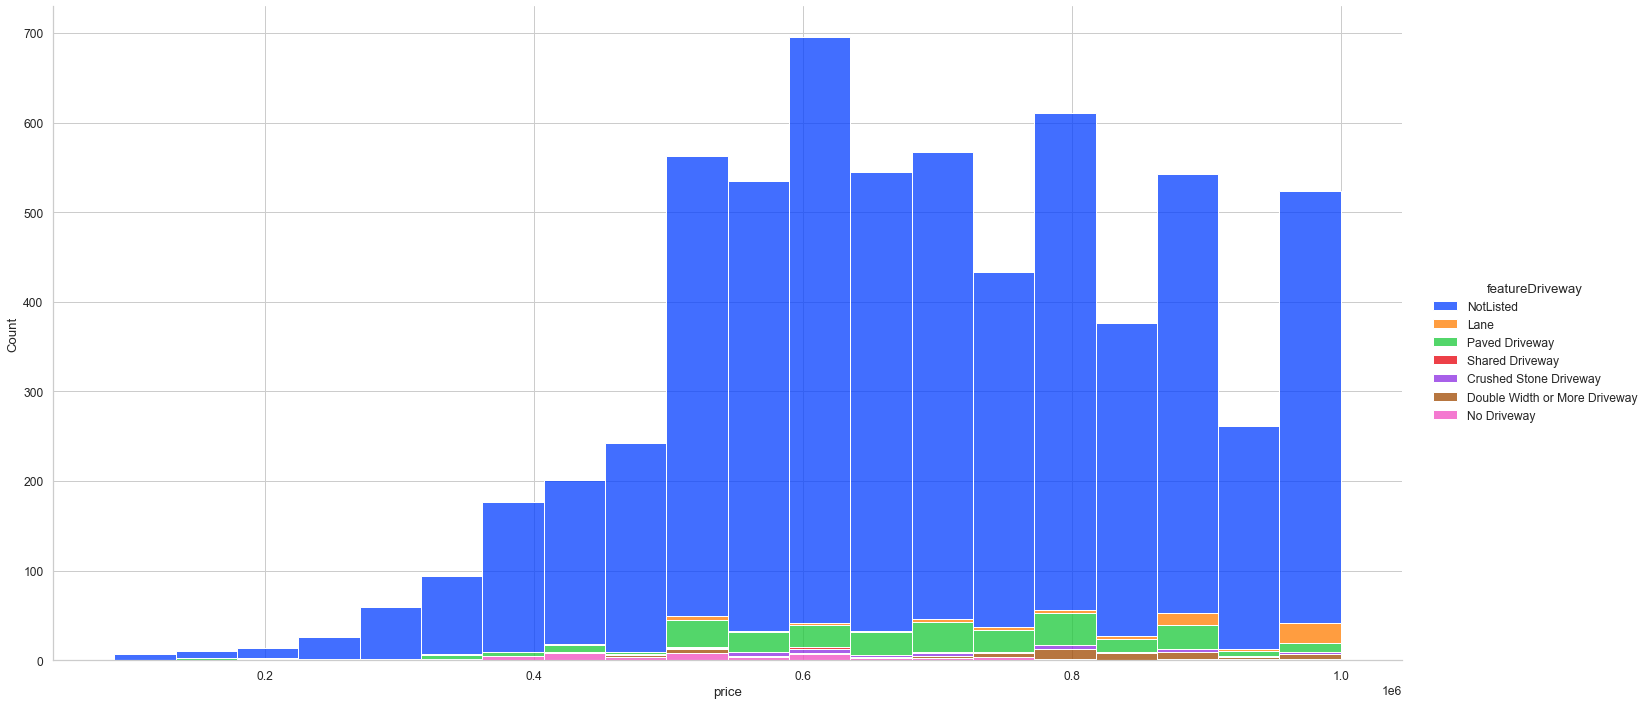

In [156]:
sns.displot(df[df["price"]<=1000000], x="price", hue="featureDriveway", multiple="stack",bins=20,
            height=10, aspect=2, palette='bright')


## featureLotPositionType

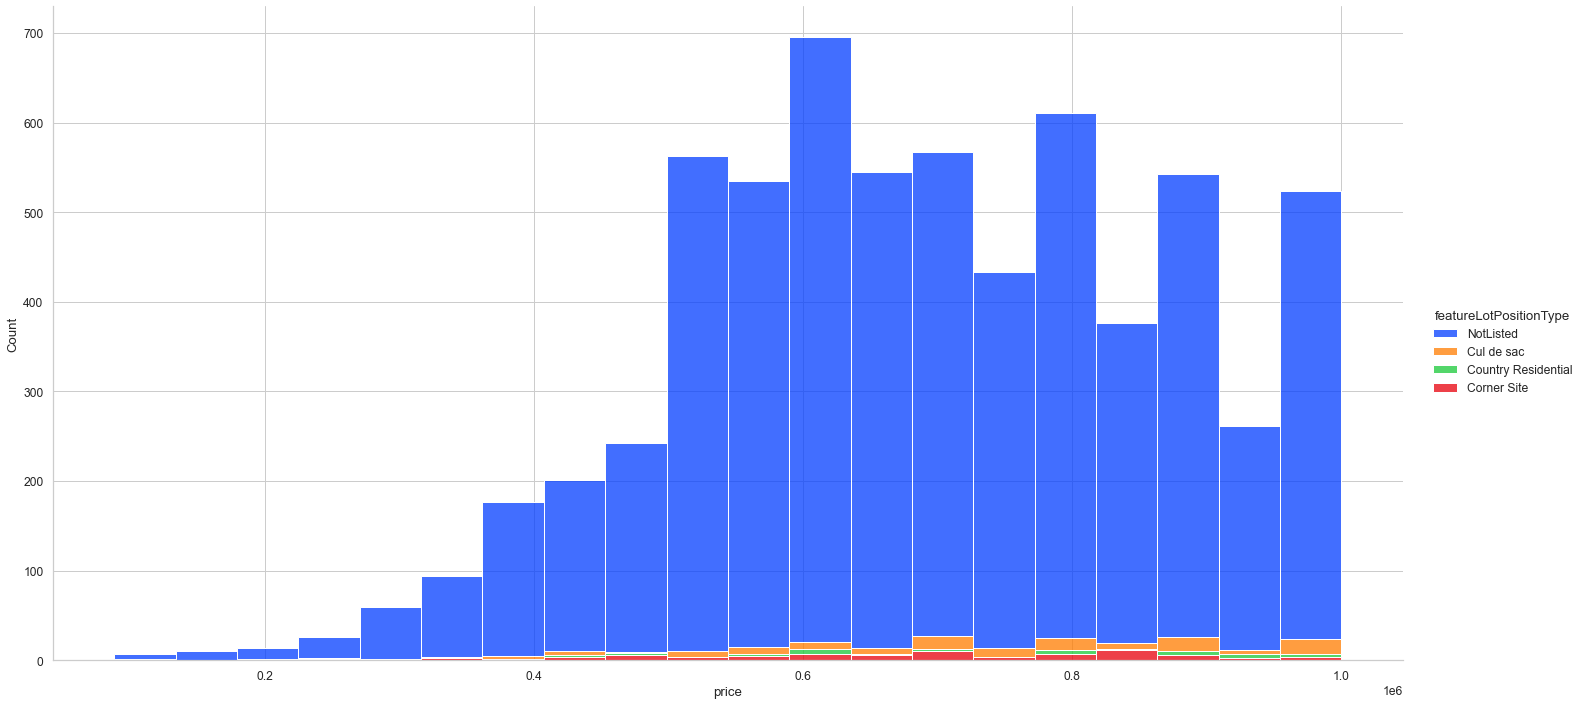

In [157]:
sns.displot(df[df["price"]<=1000000], x="price", hue="featureLotPositionType", multiple="stack",bins=20,
            height=10, aspect=2, palette='bright')


## featureOutdoorAreaType

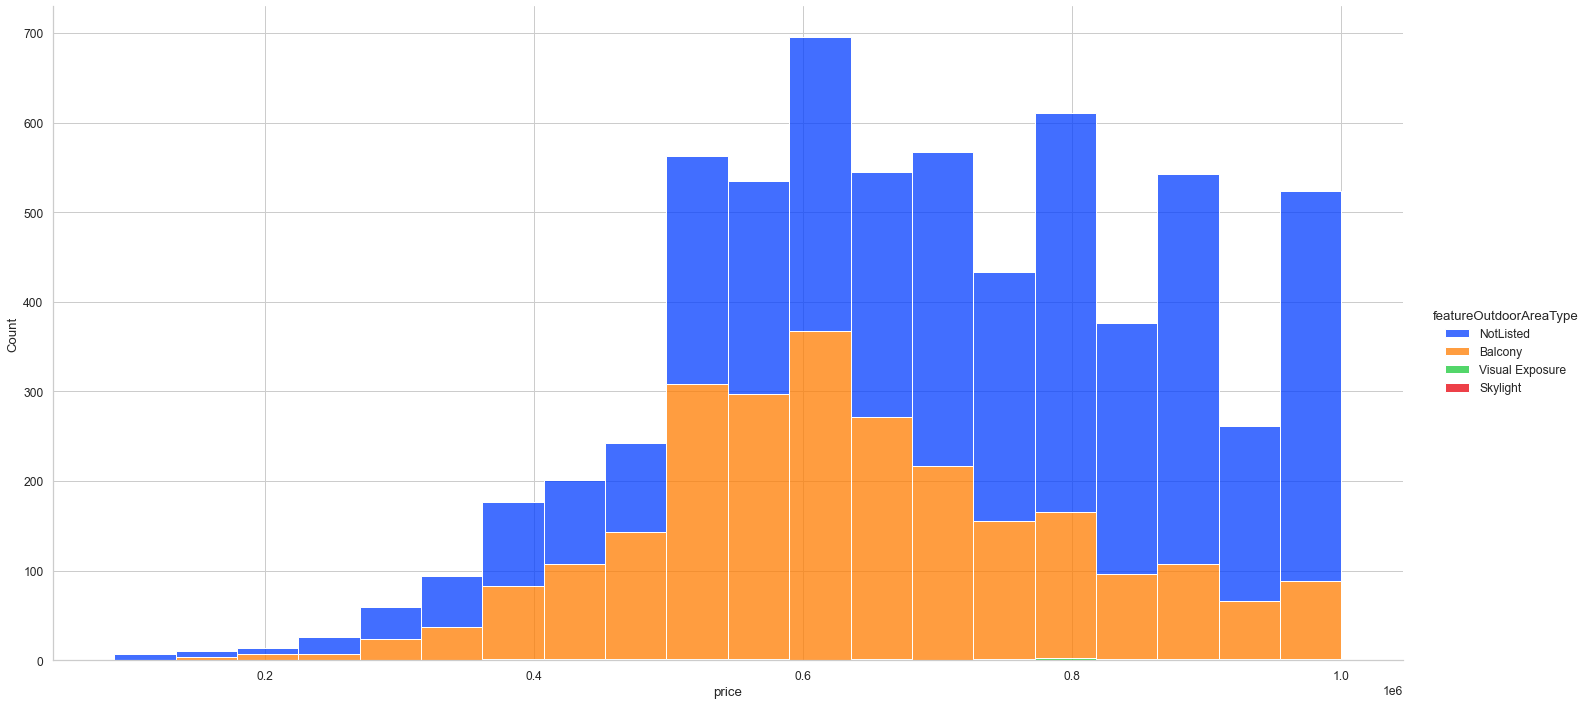

In [158]:
sns.displot(df[df["price"]<=1000000], x="price", hue="featureOutdoorAreaType", multiple="stack",bins=20,
            height=10, aspect=2, palette='bright')


## featureOutdoorLandscape

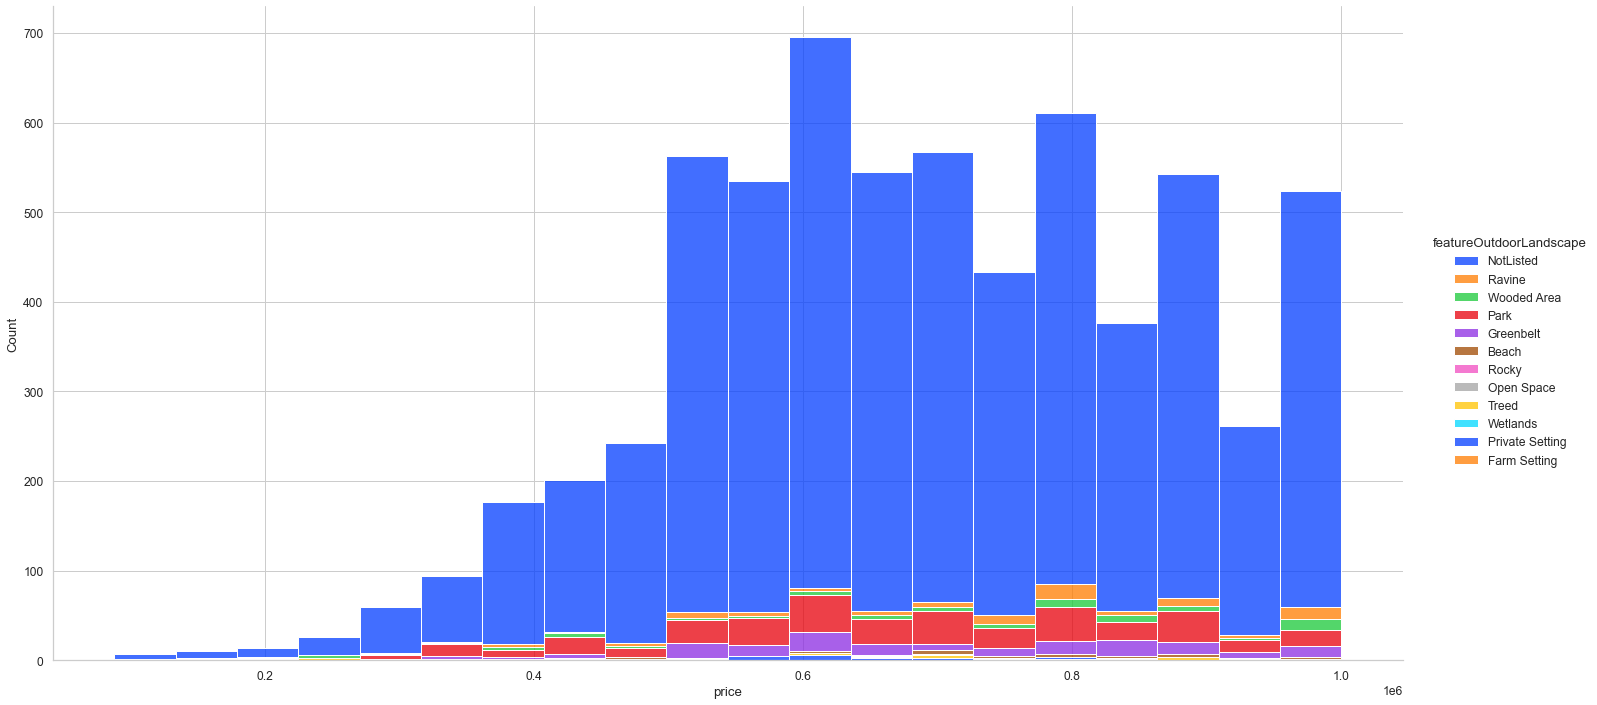

In [159]:
sns.displot(df[df["price"]<=1000000], x="price", hue="featureOutdoorLandscape", multiple="stack",bins=20,
            height=10, aspect=2, palette='bright')


## featureAdditionalFacility

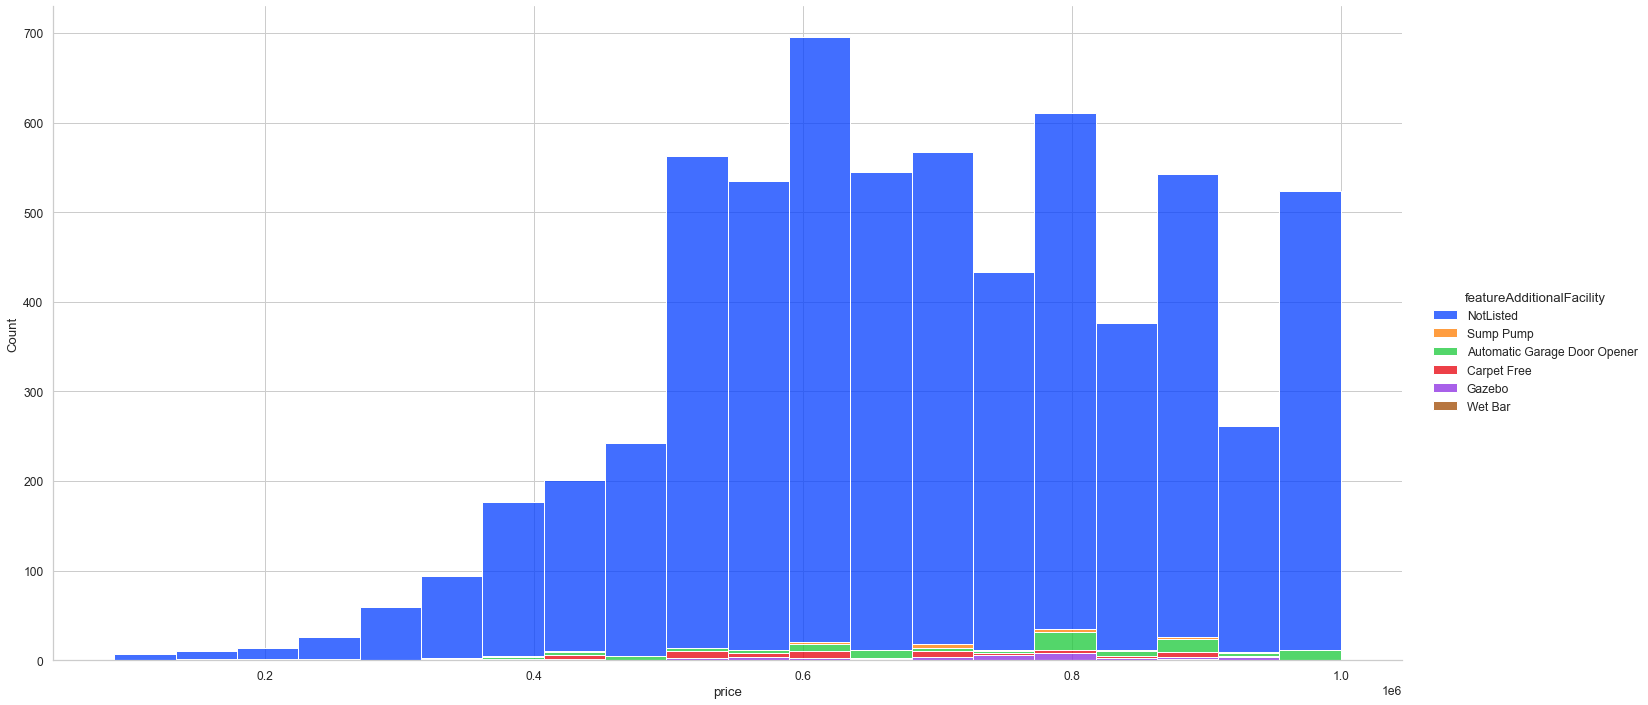

In [160]:
sns.displot(df[df["price"]<=1000000], x="price", hue="featureAdditionalFacility", multiple="stack",bins=20,
            height=10, aspect=2, palette='bright')

## Relationship with numerical variables
## Scatter Plot

## Price vs. bedroom above grade

In [161]:
df['bedroomAboveGrade'].value_counts()

3            3370
2            2463
4            1734
1            1535
5             390
0             363
NotListed     182
6             130
7              33
8              29
9              22
Name: bedroomAboveGrade, dtype: int64

## Assume if number of bedroom above grade is not listed, it is 1

In [162]:
df[df['bedroomAboveGrade']=="NotListed"].typeBuilding.value_counts()

Apartment          119
House               51
Row / Townhouse      6
Fourplex             3
Other                2
Modular              1
Name: typeBuilding, dtype: int64

In [163]:
df.loc[df['bedroomAboveGrade']=="NotListed", 'bedroomAboveGrade'] = 1
df["bedroomAboveGrade"]=pd.to_numeric(df["bedroomAboveGrade"], errors='coerce')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


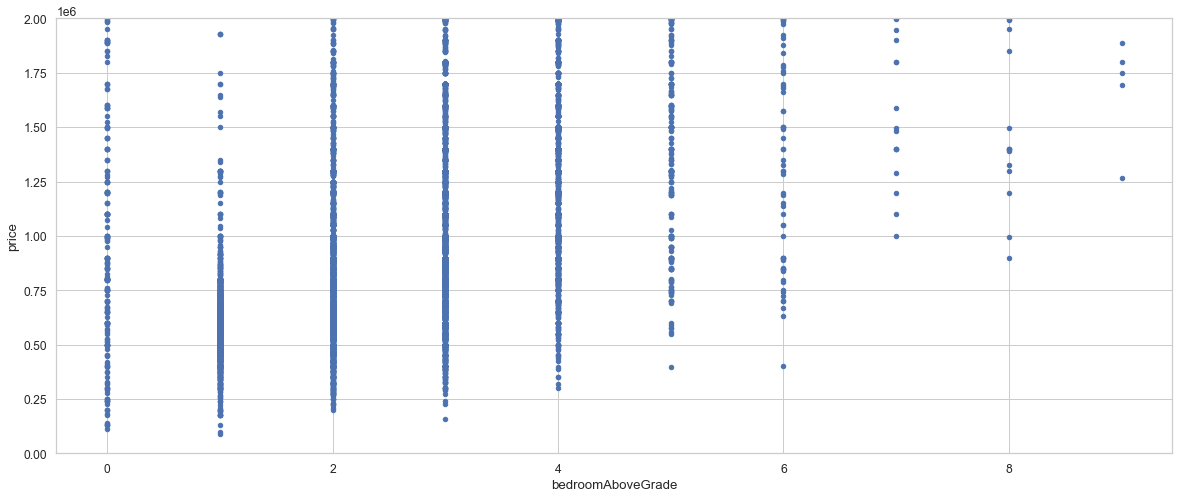

In [164]:
#scatter plot bedroomAboveGrade/saleprice
var = 'bedroomAboveGrade'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,2000000));

## bedroom below grade

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


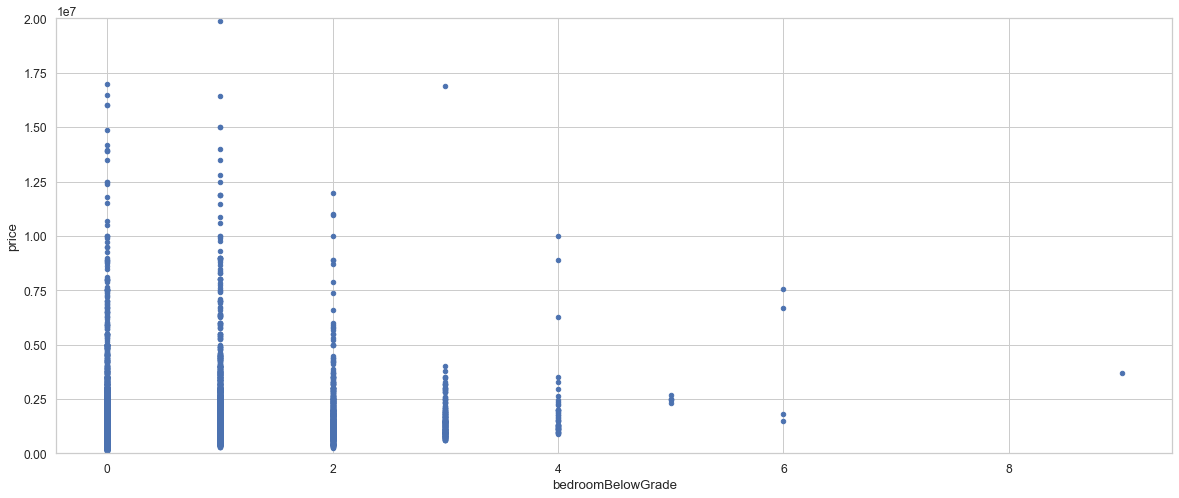

In [165]:
#scatter plot bedroomAboveGrade/saleprice
var = 'bedroomBelowGrade'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,20000000));

## add a column bedroom=bedroomAboveGrade+bedroomBelowGrade

In [166]:
df['bedroom']=df["bedroomAboveGrade"] + df["bedroomBelowGrade"]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


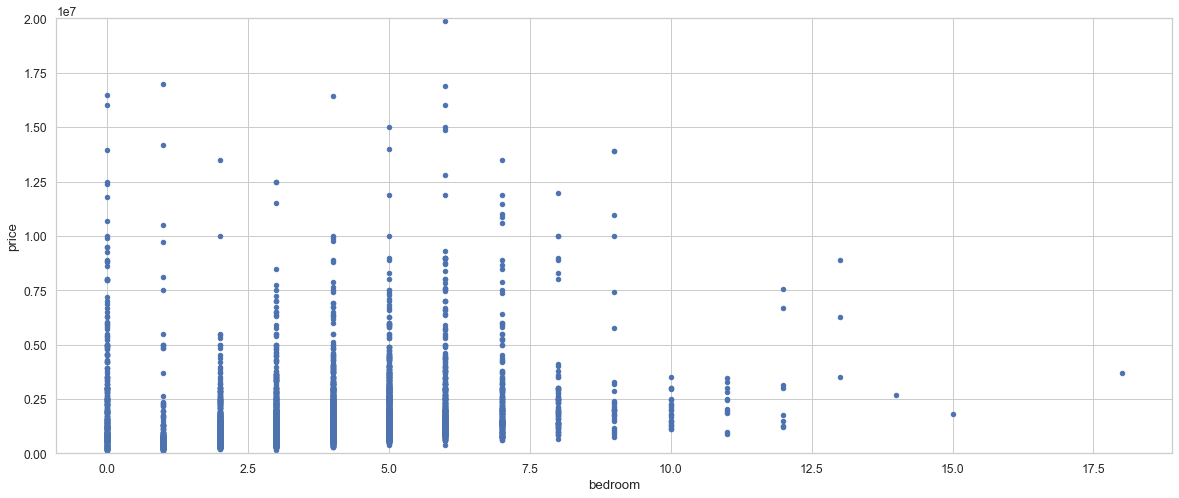

In [167]:
#scatter plot bedroomAboveGrade/saleprice
var = 'bedroom'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,20000000));

## bathroom total

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


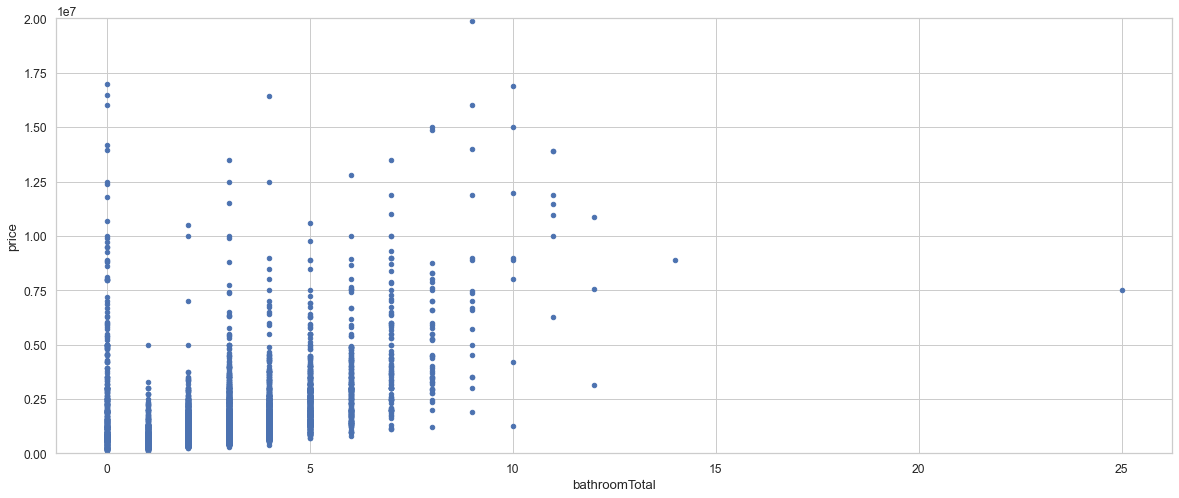

In [168]:
#scatter plot bedroomAboveGrade/saleprice
var = 'bathroomTotal'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,20000000));

## bathroom partial

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


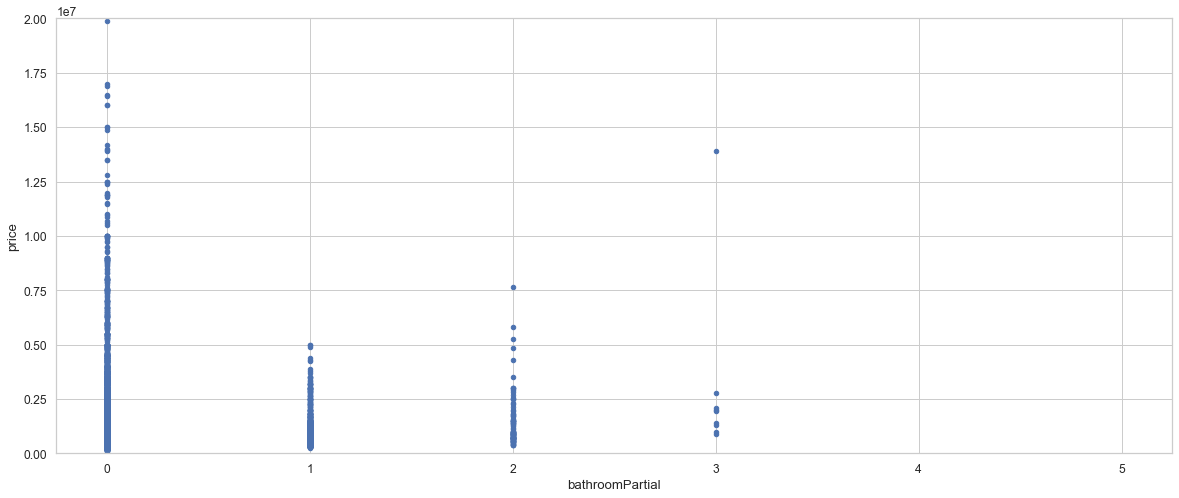

In [169]:
#scatter plot bedroomAboveGrade/saleprice
var = 'bathroomPartial'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,20000000));

## add a new column bathroom=bathroom total+bathroom partial*0.5

In [170]:
df['bathroom']=df["bathroomTotal"] + 0.5*df["bathroomPartial"]


## Check bathroom

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


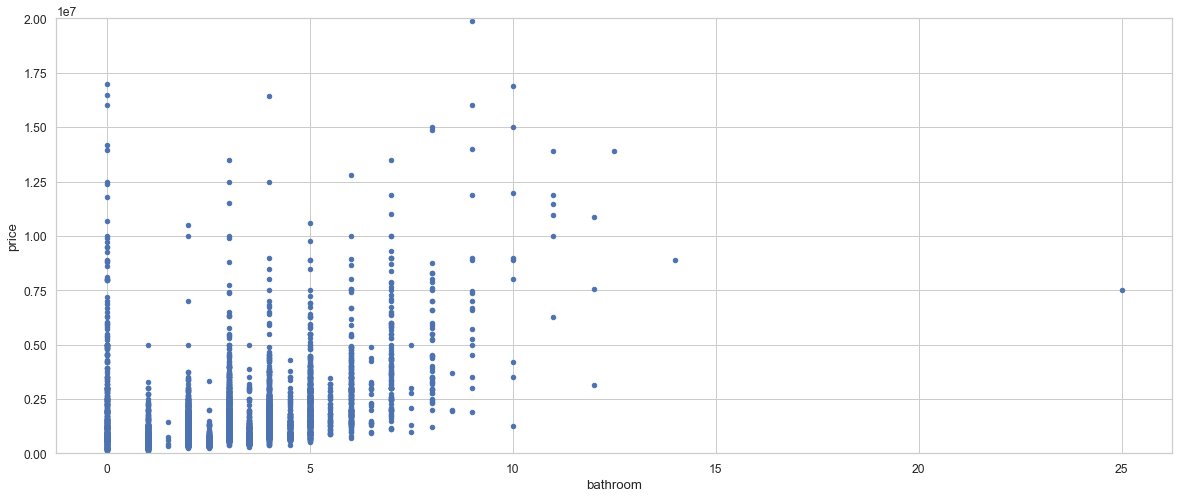

In [171]:
#scatter plot bedroomAboveGrade/saleprice
var = 'bathroom'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,20000000));

## Price vs. Land Size

In [172]:
df["landSize"].describe()

count      10251.00
mean       40372.95
std       559929.13
min            0.00
25%            0.00
50%         1932.50
75%         5500.00
max     40510800.00
Name: landSize, dtype: float64

In [173]:
df.landSize.value_counts()

0.00           4609
21780.00        685
86684.40         56
6000.00          52
5000.00          43
7500.00          42
2500.00          38
3000.00          35
5500.00          28
3750.00          27
217364.40        19
1088564.40       17
6500.00          16
3600.00          16
6600.00          16
4000.00          16
6250.00          15
3125.00          14
2750.00          14
2000.00          12
4800.00          12
5400.00          11
4500.00          11
6750.00          11
435164.40        10
2178000.00       10
3300.00           9
2400.00           9
4200.00           9
4400.00           9
7800.00           8
15000.00          8
1800.00           8
3484.80           7
4600.00           7
4356000.00        7
5750.00           7
87120.00          6
9000.00           6
7000.00           6
20000.00          6
4356.00           6
6534.00           6
5040.00           6
2200.00           6
3999.00           6
2999.00           6
2600.00           6
4050.00           6
8712.00           6


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


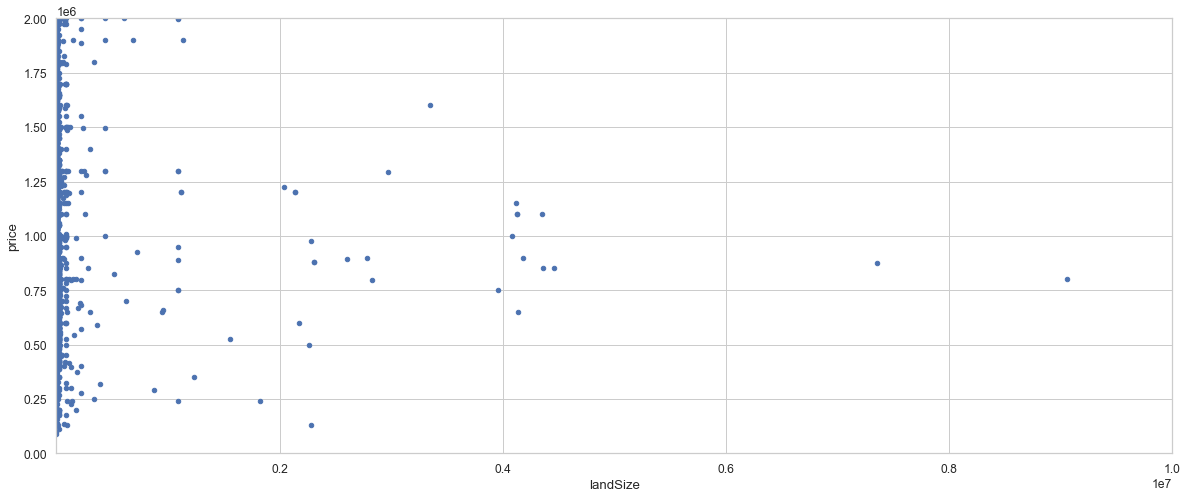

In [174]:
#scatter plot grlivarea/saleprice
var = 'landSize'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', xlim=(100,10000000), ylim=(0,2000000));


## maintenanceFees

In [175]:
df[df["maintenanceFees"]==9100]

,MLS,price,city,communityName,address,postal,description,typeBuilding,title,bedroomAboveGrade,...,WorshipPlaceNearby,WaterNearby,GolfNearby,HospitalNearby,PlaygroundNearby,ShoppingNearby,PublicTransitNearby,HighwayNearby,bedroom,bathroom
6517,C5125225,13500000,Toronto,Annex,#5B -36 HAZELTON AVEToronto,M5R2E2,Situated In One Of Yorkville's Most Exclusive ...,Apartment,Condominium,2,...,False,False,False,False,False,False,True,False,2,3.00


In [176]:
df[df["maintenanceFees"]!=0].maintenanceFees.describe()

count   4553.00
mean     668.15
std      521.64
min        0.22
25%      412.00
50%      552.10
75%      763.05
max     9100.00
Name: maintenanceFees, dtype: float64

## if maintenance fee is smaller than 5, it is input error

In [177]:
df.loc[(df["maintenanceFees"]>0)&(df["maintenanceFees"]<5), 'maintenanceFees'] = 0

In [178]:
df.maintenanceFees.value_counts()

0.00       5714
510.00       10
425.00        9
385.00        9
450.00        9
417.00        7
395.00        7
460.00        7
200.00        7
360.00        7
375.00        6
331.00        6
565.00        6
585.00        6
650.00        6
285.00        6
365.00        6
441.00        6
500.66        6
430.00        5
410.00        5
500.00        5
700.00        5
480.00        5
850.00        5
367.00        5
540.00        5
300.00        5
200.68        5
400.00        5
595.00        5
800.00        5
570.00        5
322.00        5
706.67        5
339.00        4
477.00        4
326.55        4
627.13        4
662.53        4
525.00        4
155.00        4
419.18        4
399.00        4
263.47        4
820.86        4
395.79        4
393.00        4
291.55        4
490.00        4
318.00        4
248.38        4
338.00        4
270.00        4
440.00        4
524.48        4
422.00        4
550.00        4
350.00        4
266.62        4
315.57        4
652.80        4
357.54  

## Assume that if the maintenance fee is not listed, it is the average value for those who have maintanence fee

In [179]:
df.loc[df["maintenanceFees"]==0, 'maintenanceFees'] = 670.51

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


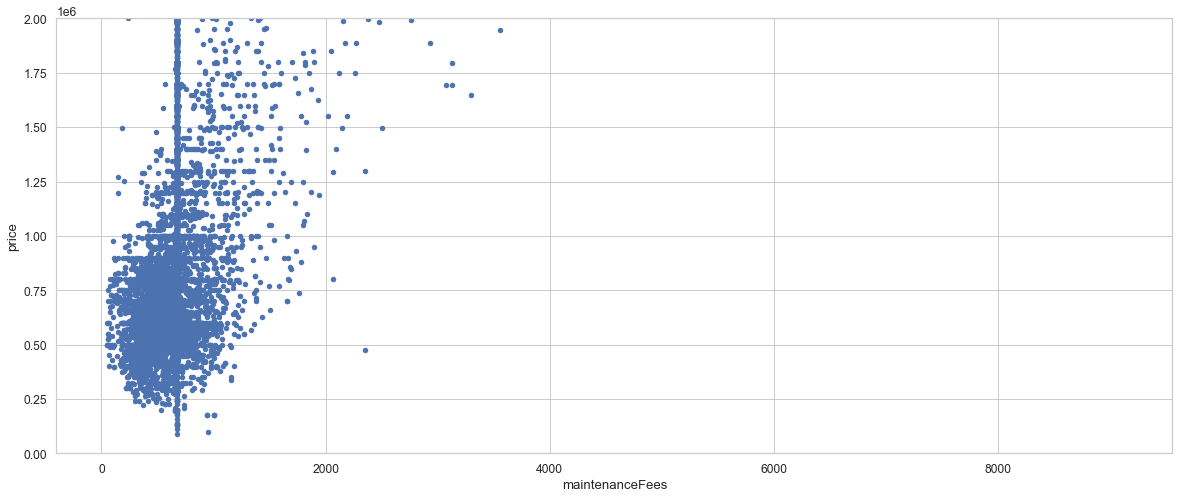

In [180]:
#scatter plot grlivarea/saleprice
var = 'maintenanceFees'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,2000000));


## Total Parking Spaces

In [181]:
df.totalParkingSpaces.value_counts()

1            3267
2            1605
3            1061
NotListed     963
4             939
6             838
0             453
5             429
8             222
7             143
10            101
9              54
12             47
20             22
13             20
11             13
15             12
14             12
17              6
18              6
22              6
24              5
23              4
16              3
30              3
25              2
100             2
50              2
26              2
51              2
31              1
29              1
260             1
19              1
27              1
32              1
63              1
Name: totalParkingSpaces, dtype: int64

In [182]:
df[df["totalParkingSpaces"]=="NotListed"].typeBuilding.value_counts()

Apartment              728
House                  176
Row / Townhouse         45
Fourplex                 4
Duplex                   3
Other                    2
Triplex                  2
Manufactured/mobile      2
Mixed                    1
Name: typeBuilding, dtype: int64

## Assume if total parking spaces is not known, it is 1


In [183]:
df.loc[df['totalParkingSpaces']=="NotListed", 'totalParkingSpaces'] = 1
df["totalParkingSpaces"]=pd.to_numeric(df["totalParkingSpaces"], errors='coerce')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


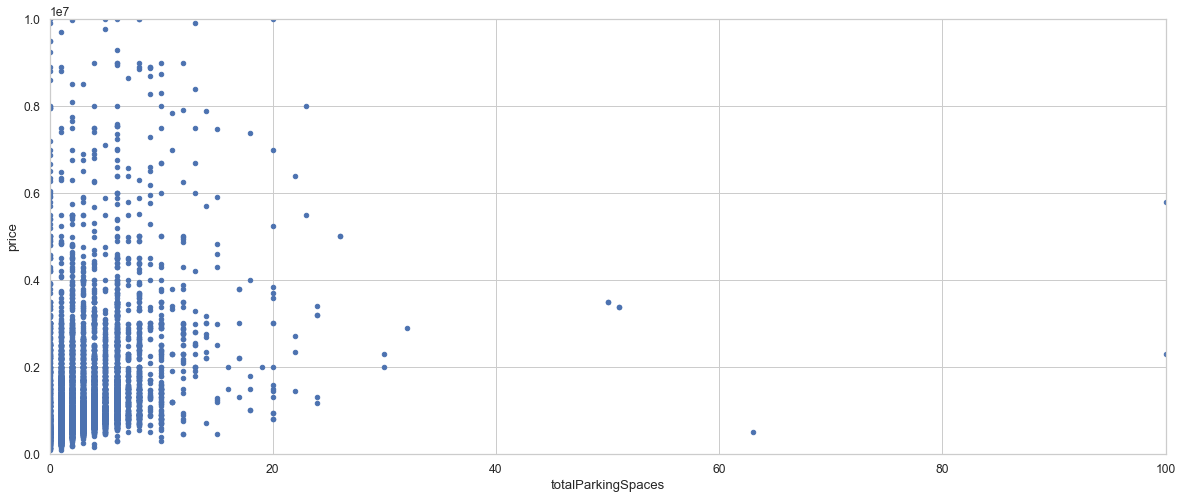

In [184]:
#scatter plot grlivarea/saleprice
var = 'totalParkingSpaces'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', xlim=(0,100), ylim=(0,10000000));


## storeys

## If it is an apartment, there should not be more than 3 storeys!

## change apartment that reports more than 3 storyes to 1.5 storey

In [185]:
df.loc[(df['storeys']>3) & (df['typeBuilding']=="Apartment"), 'storeys'] = 1.5


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


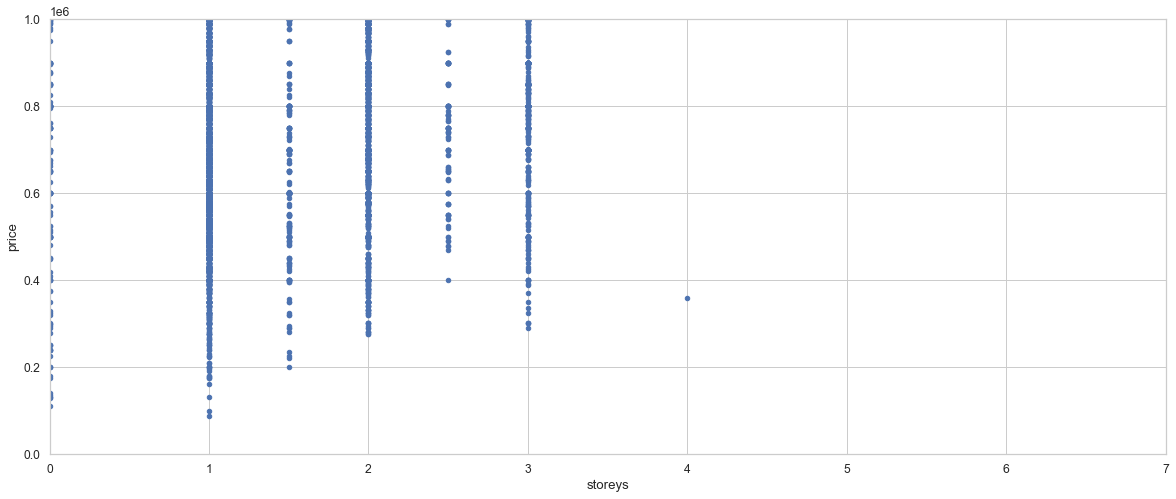

In [186]:
#scatter plot grlivarea/saleprice
var = 'storeys'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', xlim=(0,7), ylim=(0,1000000));


In [187]:
#pd.set_option('display.max_colwidth', None) #description full display
#pd.set_option("display.max_rows", 10, "display.max_columns", None) 


## Convert Postal code into lattitude and longitude

## Use Pgeocode to convert postal code to longitude and latitude

In [188]:
pd.set_option('float_format', '{:.4f}'.format)
import pgeocode

nomi = pgeocode.Nominatim('ca')
nomi.query_postal_code("L6Z")


postal_code                         L6Z
country_code                         CA
place_name        Brampton West Central
state_name                      Ontario
state_code                           ON
county_name                    Brampton
county_code                         NaN
community_name                      NaN
community_code                      NaN
latitude                        43.7328
longitude                      -79.7953
accuracy                         1.0000
Name: 0, dtype: object

In [189]:
nomi.query_location("York University Heights")

## This could take a few minutes

In [190]:
df['longitude'] = df['postal'].apply(lambda x:pgeocode.Nominatim('ca').query_postal_code(x[:3]).longitude if x != "NotListed" else 'NotListed')
df['latitude'] = df['postal'].apply(lambda x:pgeocode.Nominatim('ca').query_postal_code(x[:3]).latitude if x != "NotListed" else 'NotListed')

In [191]:
pd.set_option("display.max_rows", 10)

## For not listed postal code, use the city's longitude and latitude
## Toronto: 43.6532° N, 79.3832° W
## Toronto longitude -79.3832, latitude 43.6532
## Mississauga , -79.6441, 43.5890
## Brampton, -79.7624, 43.7315
## Hamilton, -79.8711, 43.2557
## Ottawa, -75.6972, 45.4215 



In [192]:
df.loc[(df['city']=="Toronto")&(df['postal']=="NotListed"), "longitude"]= -79.3832
df.loc[(df['city']=="Toronto")&(df['postal']=="NotListed"), "latitude"]= 43.6532

In [193]:
df.loc[(df['city']=="Mississauga")&(df['postal']=="NotListed"), "longitude"]= -79.6441
df.loc[(df['city']=="Mississauga")&(df['postal']=="NotListed"), "latitude"]= 43.5890

In [194]:
df.loc[(df['city']=="Brampton")&(df['postal']=="NotListed"), "longitude"]= -79.7624
df.loc[(df['city']=="Brampton")&(df['postal']=="NotListed"), "latitude"]= 43.7315

In [195]:
df.loc[(df['city']=="Hamilton")&(df['postal']=="NotListed"), "longitude"]= -79.8711
df.loc[(df['city']=="Hamilton")&(df['postal']=="NotListed"), "latitude"]= 43.2557

In [196]:
df.loc[(df['city']=="Ottawa")&(df['postal']=="NotListed"), "longitude"]= -75.6972
df.loc[(df['city']=="Ottawa")&(df['postal']=="NotListed"), "latitude"]= 45.4215 

In [197]:
df[df["latitude"].isnull()]

,MLS,price,city,communityName,address,postal,description,typeBuilding,title,bedroomAboveGrade,...,GolfNearby,HospitalNearby,PlaygroundNearby,ShoppingNearby,PublicTransitNearby,HighwayNearby,bedroom,bathroom,longitude,latitude
789,W5218121,679900,Brampton,Sandringham-Wellington,#25 -250 SUNNY MEADOW BLVDBrampton,L7Y3R6,Beautiful Stack Townhouse In Brampton. Bright ...,Row / Townhouse,Condominium,2,...,False,True,False,False,False,False,2,3.0000,NaN,NaN
1709,H4107255,699900,Hamilton,NotListed,93 LAVINA CrescentHamilton,L8C5J8,Stunning West Mountain 4 level backsplit - Hom...,House,Freehold,3,...,False,False,False,False,True,False,5,2.0000,NaN,NaN
1710,X5239485,699900,Hamilton,Mountview,93 LAVINA CRESHamilton,L8C5J8,Stunning West Mountain 4 Lvl Backsplit. Well C...,House,Freehold,3,...,False,False,False,False,True,False,5,2.0000,NaN,NaN
5772,C5122660,1525000,Toronto,Waterfront Communities C1,#3402 -80 JOHN STToronto,M5Y3X4,A Magnificent Unobstructed Sw View Of The Cn T...,Apartment,Condominium,2,...,False,False,False,False,True,False,3,2.0000,NaN,NaN
6584,C5224128,4095000,Toronto,Englemount-Lawrence,21 GLEN PARK AVEToronto,M2B2B8,Gorgeous Custom Build In The Heart Of Midtown!...,House,Freehold,6,...,False,False,False,False,True,False,8,6.0000,NaN,NaN
7736,W5234615,460000,Toronto,Islington-City Centre West,#202 -1040 THE QUEENSWAYToronto,M8L0A7,"This Excellent 1 Br. Unit At Loggia, Offers A ...",Apartment,Condominium,1,...,False,False,False,False,False,False,1,1.0000,NaN,NaN


## fill in null value with the city's longitude and latitude

In [198]:
df.loc[(df['city']=="Toronto")&(df['longitude'].isnull()), "longitude"]= -79.3832
df.loc[(df['city']=="Toronto")&(df['latitude'].isnull()), "latitude"]= 43.6532

In [199]:
df.loc[(df['city']=="Mississauga")&(df['longitude'].isnull()), "longitude"]= -79.6441
df.loc[(df['city']=="Mississauga")&(df['latitude'].isnull()), "latitude"]= 43.5890

In [200]:
df.loc[(df['city']=="Brampton")&(df['longitude'].isnull()), "longitude"]= -79.7624
df.loc[(df['city']=="Brampton")&(df['latitude'].isnull()), "latitude"]= 43.7315

In [201]:
df.loc[(df['city']=="Hamilton")&(df['longitude'].isnull()), "longitude"]= -79.8711
df.loc[(df['city']=="Hamilton")&(df['latitude'].isnull()), "latitude"]= 43.2557

In [202]:
df.loc[(df['city']=="Ottawa")&(df['longitude'].isnull()), "longitude"]= -75.6972
df.loc[(df['city']=="Ottawa")&(df['latitude'].isnull()), "latitude"]= 45.4215 

## Output data # 6

In [203]:
df.to_csv(output_folder+"/"+"all_after_preprocessing6.csv", index=False)